<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prelude" data-toc-modified-id="Prelude-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prelude</a></span></li><li><span><a href="#Utilities-(as-before)" data-toc-modified-id="Utilities-(as-before)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Utilities (as before)</a></span></li><li><span><a href="#Finding-Shortest-Path-(as-before)" data-toc-modified-id="Finding-Shortest-Path-(as-before)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Finding Shortest Path (as before)</a></span></li><li><span><a href="#Finding-Shortest-Delivery-Route-(as-before)" data-toc-modified-id="Finding-Shortest-Delivery-Route-(as-before)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Finding Shortest Delivery Route (as before)</a></span></li><li><span><a href="#Time-Handling" data-toc-modified-id="Time-Handling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Time Handling</a></span></li><li><span><a href="#Class-Recorder" data-toc-modified-id="Class-Recorder-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Class Recorder</a></span></li><li><span><a href="#Class-Parcel" data-toc-modified-id="Class-Parcel-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Class Parcel</a></span></li><li><span><a href="#Class-Customer" data-toc-modified-id="Class-Customer-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Class Customer</a></span></li><li><span><a href="#Class-Driver" data-toc-modified-id="Class-Driver-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Class Driver</a></span></li><li><span><a href="#Class-Delivery-Centre" data-toc-modified-id="Class-Delivery-Centre-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Class Delivery Centre</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Simulation</a></span><ul class="toc-item"><li><span><a href="#Parameters-from-Specification" data-toc-modified-id="Parameters-from-Specification-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Parameters from Specification</a></span></li><li><span><a href="#Generate-Input-Data" data-toc-modified-id="Generate-Input-Data-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Generate Input Data</a></span></li><li><span><a href="#Simulation-Routine" data-toc-modified-id="Simulation-Routine-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Simulation Routine</a></span></li><li><span><a href="#Model-Verification" data-toc-modified-id="Model-Verification-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Model Verification</a></span></li></ul></li></ul></div>

# Prelude

In [1]:
import matplotlib.pyplot as plt
import pulp
import math
import random
import pandas as pd
import numpy as np
import time
import simpy

# Utilities (as before)

## Points and Distances

In [2]:
def dist(p1, p2):
    (x1, y1) = p1
    (x2, y2) = p2
    return int(math.sqrt((x1-x2)**2+(y1-y2)**2))

## PlotMap

In [3]:
def plotMap(G, T=[], P=[], W=None,
            style='r-o', lw=1, ms=3, 
            styleT='go', msT=5,
            styleP='b-o', lwP=3, msP=1,
            stylePT='go', msPT=7,
            styleW='bo', msW=9,
            text=None, grid=False):
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    V, E = G

    if not grid:
        plt.axis('off')
    plt.plot( [ p[0] for p in V ], [ p[1] for p in V ], 'ro', lw=lw, ms=ms)
    for (p, q) in E:
        plt.plot( [ p[0], q[0] ], [ p[1], q[1] ], 'r-o', lw=lw, ms=ms)
    for t in T:
        plt.plot( [ t[0] ], [ t[1] ], 
                  styleT, ms=msT)
    plt.plot( [ p[0] for p in P ],
              [ p[1] for p in P ], 
              styleP, lw=lwP, ms=msP)
    for p in P:
        if p in T:
            plt.plot( [ p[0] ], [ p[1] ], 
                      stylePT, ms=msPT)
    if W is not None:
        plt.plot( [ W[0] ], [ W[1] ], 
                      styleW, ms=msW)
    if text is not None:
        maxX = max([p[0] for p in V])
        plt.text(0.8*maxX, 0, text)
    if grid:
        plt.grid()
    plt.show()

In [4]:
def plotMap(G, T=[], P=[], W=None,
            style='r-o', lw=1, ms=3, 
            styleT='go', msT=5,
            styleP='b-o', lwP=3, msP=1,
            stylePT='go', msPT=7,
            styleW='bo', msW=9,
            text=None, grid=False):
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    V, E = G

    if not grid:
        plt.axis('off')
    plt.plot( [ p[0] for p in V ], [ p[1] for p in V ], 'ro', lw=lw, ms=ms)
    for (p, q) in E:
        plt.plot( [ p[0], q[0] ], [ p[1], q[1] ], 'r-o', lw=lw, ms=ms)
    for t in T:
        plt.plot( [ t[0] ], [ t[1] ], 
                  styleT, ms=msT)
    plt.plot( [ p[0] for p in P ],
              [ p[1] for p in P ], 
              styleP, lw=lwP, ms=msP)
    for p in P:
        if p in T:
            plt.plot( [ p[0] ], [ p[1] ], 
                      stylePT, ms=msPT)
    if W is not None:
        plt.plot( [ W[0] ], [ W[1] ], 
                      styleW, ms=msW)
    if text is not None:
        maxX = max([p[0] for p in V])
        plt.text(0.8*maxX, 0, text)
    if grid:
        plt.grid()
    plt.show()

## Add Targets

In [5]:
def addTargets(M, T):
    V, E = M
    E = E.copy()
    V = V.copy()
    for t in T:
        minD = math.inf
        minE = None
        for e in E:
            P, Q = e
            distT = dist(P, t)+dist(t, Q)-dist(P, Q)
            if distT < minD:
                minD = distT
                minE = e
        P, Q = minE
        E.remove( (P, Q) )
        E.append( (P, t) )
        E.append( (t, Q) )
        V.append(t)
    return V, E

## Generate Warehouse Location

In [6]:
def generateWarehouseLocation(M):
    V, _ = M
    W = random.sample(V, k=1)[0]
    return W

## Time Handling

**Convention:** In this project we measure time in seconds. The simulation will start at 0:00. Time related methods will be added as they are needed.

`timestamp(t)` generates a timestamp string in the form `[dd] hh:mm:ss.d`

In [7]:
    def timestamp(t):
        day = int(t)//(24*3600)
        t = t - day*24*3600
        hour = int(t)//3600
        t = t - hour*3600
        mins = int(t)//60
        t = t - mins*60
        secs = int(math.floor(t))
        t = int(math.floor((t - secs)*10))
        return f"[{day:2d}] {hour:02d}:{mins:02d}:{secs:02d}.{t:1d}"

In [8]:
timestamp(24*3600*3+17*3600+615.1)

'[ 3] 17:10:15.0'

In [9]:
def nextHour(env, hour):
    beginningOfDay = int(env.now//(24*3600))*24*3600
    timeOfDay = env.now-beginningOfDay
    if hour*3600 > timeOfDay:
        return hour*3600 - timeOfDay
    else:
        return hour*3600 + 24*3600 - timeOfDay

In [10]:
def day(now):
    return int(now//(24*3600))

## Plotting Routines

In [11]:
import scipy.stats as stats

def histplot(data, title="", xlabel="",
             width=None, height=None):
    
    minx = min(data)
    maxx = max(data)
    μ = np.mean(data)
    σ = np.std(data)
    
    fig = plt.figure()
    fig.set_figwidth(width if width is not None else 4)
    fig.set_figheight(height if height is not None else 2.5)
    ax = fig.gca()
        
    bins=(maxx-minx)//5+1
    hist=plt.hist(data, density=True, bins=bins)
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    plt.title(title)
        
    x = np.linspace(minx, maxx, 100)
    y = [ stats.norm(loc=μ, scale=σ).pdf(p) for p in x]
    ax.plot(x, y, lw=1, color='red')
    ax.axvline(x=μ, color='red')
    maxy = max(max(y), max(hist[0]))
    ax.text(maxx, maxy, 
            f'μ={μ:2.2f}\nσ={σ:2.2f}', 
            ha='right', va='top', 
            color='red', fontsize=12)
    ax.grid(True)
    plt.show()

In [12]:
def dailyPlot(data, 
              title="", ylabel="",
              width=None, height=None):
    
    days = len(data)
    
    fig = plt.figure()
    fig.set_figwidth(width if width is not None else 6)
    fig.set_figheight(height if height is not None else 2)
    
    ax = fig.gca()
    diff = (max(data)-min(data))*0.1
    ymin = int(math.floor(min(data)-diff))
    ymax = int(math.ceil(max(data)+diff))
    ax.set_xlim(-1, days)
    ax.set_ylim(ymin, ymax)
    ax.grid(True)
    
    ms = 2 if len(data)>100 else 5
    lw = 0.5 if len(data)>100 else 1

    x = np.arange(0, len(data))
    y = np.array([ y for y in data ])
    b, m = np.polynomial.polynomial.polyfit(x, y, 1)
    
    plt.plot(x, y, 'bo-', linewidth=lw, markersize=ms)
    plt.plot(x, m*x+b, 'r-')
    
    plt.xlabel('Day')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Finding Shortest Path (as before)

In [13]:
def dist(p1, p2):
    (x1, y1) = p1
    (x2, y2) = p2
    return int(math.sqrt((x1-x2)**2+(y1-y2)**2))

In [14]:
def pathLength(P):
    return 0 if len(P)<=1 else \
            dist(P[0], P[1])+pathLength(P[1:])

In [15]:
def shortestPath(M, A, B):

    def h(p): 
        return pathLength(p)+dist(p[-1],B)
    
    # candidates C are pairs of the path so far and 
    # the heuristic function of that path, 
    # sorted by the heuristic function, as maintained by
    # insert function
    def insert(C, p):
        hp = h(p)
        c = (p, hp)
        for i in range(len(C)):
            if C[i][1]>hp:
                return C[:i]+[c]+C[i:]
        return C+[c]   
        
    V, E = M
    assert(A in V and B in V)    
    C = insert([], [A])

    while len(C)>0:
        # take the first candidate out of the list of candidates
        path, _ = C[0]
        C = C[1:]
        if path[-1]==B:
            return path
        else:
            for (x, y) in E:
                if path[-1]==x and y not in path:
                    C = insert(C, path+[y])
                elif path[-1]==y and x not in path:
                    C = insert(C, path+[x])
    return None

# Finding Shortest Delivery Route (as before)

In [16]:
def createTables(M, T):

    def reverse(P):
        return [ P[-i] for i in range(1,len(P)+1) ]
    
    def index(x, L):
        for i in range(len(L)):
            if x==L[i]: 
                return i
        return None

    n = len(T)
    d = [ [ math.inf for t in T ] for t in T ]
    p = [ [ None for t in T ] for t in T ]
    for i in range(n):
        d[i][i] = 0
        p[i][i] = [ T[i] ]
    for i in range(n):
        for j in range(n):
            if p[i][j] is None:
                s = shortestPath(M, T[i], T[j])
                d[i][j] = d[j][i] = pathLength(s)
                p[i][j] = s
                p[j][i] = reverse(s)
                for m in range(len(s)-1):
                    smi = index(s[m], T)
                    if smi is None:
                        continue
                    for l in range(m+1, len(s)):
                        sli = index(s[l], T)
                        if sli is None:
                            continue  
                        sub = s[m:l+1]
                        if p[smi][sli] is None:
                            p[smi][sli] = sub
                            p[sli][smi] = reverse(sub)
                            d[smi][sli] = d[sli][smi] = pathLength(sub)
    return d,p               

In [17]:
def roundtrips(x, n):
    
    def isElem(x, l):
        for i in range(len(l)):
            if l[i]==x:
                return True
        return False

    def startpoint(trips):
        for i in range(n):
            for t in trips:
                if isElem(i, t):
                    break
            else:
                return i
    
    def totalLength(trips):
        s=0
        for i in range(0, len(trips)):
            s += len(trips[i])-1
        return s

    trips = []
    while totalLength(trips)<n:
        start = startpoint(trips)
        trip = [ start ]
        i = start
        while len(trip) < n-totalLength(trips):
            for j in range(0, n):
                if pulp.value(x[i][j])==1:
                    trip.append(j)
                    i=j
                    break        
            if pulp.value(x[trip[-1]][start])==1:
                trip.append(start)
                break
        trips.append(trip)
    return sorted(trips, key=lambda t: len(t), reverse=True)

def createLoop(M, T):
    D, P = createTables(M, T)
    n = len(T)
    # create variables
    x = pulp.LpVariable.dicts("x", ( range(n), range(n) ),
                            lowBound=0, upBound=1, cat=pulp.LpInteger)
    # create problem
    prob = pulp.LpProblem("Loop",pulp.LpMinimize)
    # add objective function
    prob += pulp.lpSum([ D[i][j]*x[i][j] 
                             for i in range(n) for j in range(n) ])
    # add constraints
    constraints=0
    for j in range(n):
        prob += pulp.lpSum([ x[i][j] for i in range(n) if i!=j ]) ==1
    constraints += n
    for i in range(n):
        prob += pulp.lpSum([ x[i][j] for j in range(n) if i!=j ]) ==1
    constraints += n
    for i in range(n):
        for j in range(n):
            if i!=j:
                prob += x[i][j]+x[j][i] <= 1
                constraints += 1
    # initialise solver
    solvers = pulp.listSolvers(onlyAvailable=True)
    solver = pulp.getSolver(solvers[0], msg=0)
    # print(f"{constraints:d} Constraints")
    prob.solve(solver)
    trips = roundtrips(x, n)
    while len(trips)>1:
        for t in trips:
            prob += pulp.lpSum([ x[t[i]][t[i+1]] + x[t[i+1]][t[i]]
                            for i in range(0,len(t)-1) ]) <= len(t)-2
            constraints += 1
        # print(f"{constraints:d} Constraints")
        prob.solve(solver)
        trips = roundtrips(x, n)
    trip = trips[0]
    # print(trip)
    loop = []
    for k in range(len(trip)-1):
        sub = P[trip[k]][trip[k+1]]
        loop += sub if len(loop)==0 else sub[1:]
    return loop

# Class Recorder

We willl use a class Recorder as a reference point for capturing data during the simulation. There will be only one recorder. It will be created at the beginning of every simulation run. Every entity will carry a reference to the Recorder. 

In [18]:
class Recorder:
    
    def __init__(self, env, M, W, C, days, 
                 log=False, plot=False, timing=False):
        self.env = env
        self.M = M
        self.W = W
        self.C = C
        self.days = days
        self.log = log
        self.plot = plot
        
        self.timing = timing
        self.start_time = time.time()
        self.last_time = self.start_time
        self.cum_timer = {}

        Customer.REGISTER = []
        Parcel.REGISTER = []

        # create a data frame for records per working day
        self.daily = pd.DataFrame()
        self.daily['begin work at'] = [None]*days
        self.daily['end work at'] = [None]*days
        self.daily['dist'] = [None]*days
        self.daily['left'] = [None]*days

    def timer(self, s):
        t = time.time()
        Δt = t-self.last_time
        if self.timing:
            print(f"==== t: {t-self.start_time:6.2f}s "
                  f"Δt: {Δt:6.2f}s [{s:s}]")
        if s in self.cum_timer:
            self.cum_timer[s] += Δt
        else:
            self.cum_timer[s] = Δt
        self.last_time = t

    def reportTimer(self):
        print(f"==== t: {self.total_time:6.2f}s Total")
        for k in sorted(self.cum_timer, key=lambda x: self.cum_timer[x], reverse=True):
            print(f"==== ΣΔt: {self.cum_timer[k]:6.2f}s "+ k)

    def trace(self, event):
        if self.log:
            print(timestamp(self.env.now), event)

    def recordDriverBeginsWork(self):
        self.trace("Driver arrives for work")
        self.daily.at[day(self.env.now), 'begin work at'] = int(round(self.env.now))
        
    def recordDriverEndsWork(self):
        self.trace("Driver goes home")
        self.daily.at[day(self.env.now), 'end work at'] = int(round(self.env.now))
    
    def recordTourLength(self, length):
        self.daily.at[day(self.env.now), 'dist'] = int(length)

    def recordParcelsLeftOver(self, numberOfParcels):
        self.trace(f"{numberOfParcels:d} left over for next day")
        self.daily.at[day(self.env.now), 'left'] = numberOfParcels

    def finish(self):
        self.total_time = time.time()-self.start_time
        self.daily['working time'] = (self.daily['end work at']-self.daily['begin work at'])//60
        # simulation is finished for good
        # by removing the simulation environment we can
        # pickle recorder
        self.env = None
        
    def __stats__(self, column):
        d = self.daily[column].copy()
        return d.mean(), d.median(), d.std()
        
    def statsWorkingTime(self):
        return self.__stats__('working time')
        
    def histWorkingTime(self):
        histplot(self.daily['working time'],
                 xlabel='Working Time [min]',
                 title='Daily Working Time')
        
    def plotWorkingTime(self):
        dailyPlot(self.daily['working time'],
                  ylabel='Working Time [min]',
                  title='Daily Working Time')

    def statsTourLength(self):
        return self.__stats__('dist')
        
    def histTourLength(self):
        histplot(self.daily['dist'],
                 xlabel='Tour Length [m]',
                 title='Daily Tour Length')
            
    def plotTourLength(self):
        dailyPlot(self.daily['dist'],
                  ylabel='Tour Length [m]',
                  title='Daily Tour Length')

    def statsLeftOver(self):
        return self.__stats__('left')
        
    def histLeftOver(self):
        histplot(self.daily['left'],
                 xlabel='Left-Over Parcels',
                 title='Daily Left-Over Parcels')
                
    def plotLeftOver(self):
        dailyPlot(self.daily['left'],
                  ylabel='Number of Parcels',
                  title='Daily Left-Over Parcels')

# Class Parcel

<img src='EventGraph Parcel.png' width=500/>

Parcels follow through a sequence of states:
- processing
- in transit (from manufacture to distribution centre)
- arrived in distribution centre
- ready for delivery 
- out for delivery
- customer not present
- returned to distribution centre
- delivered

In [19]:
class Parcel:
    
    REGISTER = []
    
    def __init__(self, rec, i, cust, custIndex):
        self.rec = rec
        self.i = i  # row index in data frames of input data
        self.dest = cust.location
        self.custIndex = custIndex
        self.status = [ 'processing' ] # status record and
        self.timing = [ self.rec.env.now ]      # timing
        assert(len(Parcel.REGISTER)==i)
        Parcel.REGISTER += [ self ] 
    
    # factory method ensures that there is only
    # one Parcel per location
    def getParcel(rec, i, location, custIndex):
        for p in Parcel.REGISTER:
            if p.i == i:
                return p
        return Parcel(rec, i, location, custIndex)

    
    def __str__(self):
        return f"Parcel: {self.i:3d} ({self.custIndex:3d})"

    def index(self):
        return self.i
    
    def destination(self):
        return self.dest
    
    def __reg(self, state):
        self.status += [ state ]
        self.timing += [ self.rec.env.now ]
        self.rec.trace(str(self)+" "+state)
        
    def arrivedAtDeliveryCentre(self):
        self.__reg('arr at delivery centre')
        
    def outForDelivery(self): 
        self.__reg('out for delivery')
        
    def returnFromDelivery(self):
        self.__reg('return from delivery')
    

# Class Customer

<img src='EventGraph Customer.png' width=500/>

In [20]:
class Customer:
    
    REGISTER = []

    def __init__(self, rec, location):
        self.rec = rec
        self.location = location
        self.i = len(Customer.REGISTER)
        Customer.REGISTER += [ self ]
        self.atHome = True
        self.answersDoor = False
        self.parcelsReceived = []
        rec.env.process(self.process())
        
    def __str__(self):
        return f"Customer: {self.i:2d} {str(self.location):s}"
    
    # factory method ensures that there is only
    # one customer per location
    def getCustomer(rec, location):
        for c in Customer.REGISTER:
            if c.location == location:
                return c
        return Customer(rec, location)
    
    def leaveHouse(self):
        assert(self.atHome and not self.answersDoor)
        # self.rec.trace(str(self)+" leaves house")
        self.atHome = False
     
    def returnHome(self):
        assert(not self.atHome)
        # self.rec.trace(str(self)+" returns home")
        self.atHome = True
        
    def answerDoor(self):
        if self.atHome:
            yield self.rec.env.timeout(random.expovariate(1/AVERAGE_TIME_ANSWER_DOOR))
            self.rec.trace(str(self)+" answers door")
            self.answersDoor = True
        else:
            yield self.rec.env.timeout(WAIT_TIME_IF_CUSTOMER_DOESNT_ANSWER_DOOR)
            self.rec(str(self)+" not at home")
            
    def acceptParcel(self, parcel):
        assert(self.answersDoor)
        self.parcelsReceived += [parcel]
        self.rec.trace(str(self)+" accepts "+str(parcel))
        
    def signOff(self):
        assert(self.answersDoor)
        self.rec.trace(str(self)+" signs off")
        self.answersDoor = False
        
    def process(self):
        yield self.rec.env.timeout(nextHour(self.rec.env, 8))
        while day(self.rec.env.now)<self.rec.days:
            # in a refinement we may use random times
            self.leaveHouse()
            yield self.rec.env.timeout(nextHour(self.rec.env, 18))
            self.returnHome()
            yield self.rec.env.timeout(nextHour(self.rec.env, 8))

# Class Driver

<img src='EventGraph Driver.png' width=500/>

In [21]:
class Driver:
    
    def __init__(self, rec, DC):
        self.rec = rec
        self.DC = DC
        self.location = None
        self.parcels = None
        self.tour = None
        self.rec.env.process(self.process())
        
    # activity
    def __drive(self, target):
        assert(self.tour[0] == self.location)
        while self.location!=target:
            d = dist(self.location, self.tour[1])
            yield self.rec.env.timeout(d / AVERAGE_SPEED)
            self.location = self.tour[1]
            self.tour = self.tour[1:]
        assert(self.tour[0] == self.location == target)
    
    def arriveForWork(self):
        self.location = self.DC.W
        self.parcels = []
        self.returns = []
        self.tour = [ self.DC.W ]
        self.rec.recordDriverBeginsWork()
        
    def leaveForDelivery(self, tour, parcels):
        self.tour, self.parcels = tour, parcels
        self.rec.trace(f"Driver leaves for delivery " \
                       f"of {len(parcels):d} parcels")
        
    def process(self):
        yield self.rec.env.timeout(nextHour(self.rec.env, 18))
        while day(self.rec.env.now)<self.rec.days:
            self.arriveForWork()
            tour, parcels = self.DC.sendForDelivery()
            yield self.rec.env.timeout(PREP_TIME_PER_PARCEL*len(parcels))
            self.rec.recordTourLength(pathLength(tour))
            self.leaveForDelivery(tour, parcels)        
            while len(self.parcels)>0:
                # drive to customer
                custLocation = self.parcels[0].dest
                cust = Customer.getCustomer(self.rec, custLocation)
                self.rec.trace("Driver drives to "+str(cust))
                yield from self.__drive(custLocation)
                self.rec.trace("Driver arrived at "+str(cust))
                # call at customer
                yield from cust.answerDoor()
                
                if cust.answersDoor:
                    while len(self.parcels)>0 and \
                            custLocation == self.parcels[0].dest:
                        cust.acceptParcel(self.parcels[0])
                        yield self.rec.env.timeout(random.expovariate(1/10))
                        self.parcels = self.parcels[1:]
                    cust.signOff()
                    yield self.rec.env.timeout(random.expovariate(1/10))
                else:
                    while len(self.parcels)>0 and  \
                            custLocation == self.parcels[0].dest:
                        self.returns += self.parcels[0]
                        self.parcels = self.parcels[1:]

            # return to delivery centre
            self.rec.trace("Driver returns to delivery centre")
            yield from self.__drive(self.DC.W)
            self.rec.trace("Driver arrived at delivery centre")
            
            for parcel in self.returns:
                self.DC.returnFromDelivery(parcel)
                yield self.rec.env.timeout(RETURN_TIME_PER_PARCEL)
            yield self.rec.env.timeout(600)
                    
            self.rec.recordParcelsLeftOver(len(self.DC.parcels)+
                                           len(self.DC.leftOver))

            self.rec.recordDriverEndsWork()
            
            self.rec.trace(self.DC.inventory())
            
            yield self.rec.env.timeout(nextHour(self.rec.env, 18))

# Class Delivery Centre

<img src="EventGraph Delivery Centre.png" width=300/>

In [22]:
class DeliveryCentre:
    
    def __init__(self, rec, M, W):
        self.rec = rec
        self.M = M
        self.W = W
        self.limit = 40000
        
        
        self.leftOver = []    # list of parcels
        self.parcels = []     # list of parcels scheduled for delivery
        self.dest = []        # list of unique customer destinations
        self.tour = [W]       # tour planned for delivery
        
    def __accept(self, parcel):
        custLoc = parcel.dest
        if custLoc not in self.dest:
            start_time = time.time()
            MT = addTargets(self.M, self.dest + [custLoc])
            self.rec.timer("addTarget")
            S = createLoop(MT, [self.W] + self.dest + [custLoc])
            self.rec.timer("createLoop")
            if pathLength(S)<self.limit:
                self.parcels.append(parcel)
                self.dest += [custLoc]
                self.tour = S
            else:
                self.leftOver.append(parcel)
        else:
            self.parcels.append(parcel)
        
    def acceptParcel(self, parcel):
        parcel.arrivedAtDeliveryCentre()
        self.__accept(parcel)
            
    def sendForDelivery(self):
        parcels = []
        tour = self.tour
        addresses = self.dest
        
        # pick parcels in sequence to be delivered
        for i in range(1, len(tour)-1):
            dest = tour[i]
            for p in self.parcels:
                if p.dest == dest and p not in parcels:
                    parcels += [p]
                    p.outForDelivery()
         
        # arrange the left overs
        L = self.leftOver
        self.tour = [self.W]
        self.parcels = []
        self.leftOver = []
        self.dest = []
        for p in L:
            self.__accept(p)
        
        if self.rec.plot:
            plotMap(self.rec.M, T=addresses, P=tour, W=tour[0], 
                    text=f"Day {day(self.rec.env.now):2d}, {pathLength(tour):,d}m")

        return tour, parcels
                 
    def returnFromDelivery(self, parcel):
        parcel.returnFromDelivery()
        self.__accept(parcel)

    def getInventory(self):
        acc = ""
        for p in self.parcels:
            if len(acc)>0:
                acc += ", "
            acc += f"{p.custIndex:d}"
        acc += " / "
        for p in self.leftOver:
            if len(acc)>0:
                acc += ", "
            acc += f"{p.custIndex:d}"
        return acc
        
    def inventory(self):
        return f"Delivery Centre Inventory: " \
               f"{len(self.parcels)+len(self.leftOver):d}"

# Simulation

## Parameters from Specification

The time required for driving is based on the distance between way points at an average speed of 15km/h.

In [23]:
AVERAGE_SPEED = 15/3.6

The **cumulative preparation time** (route planning and 
sorting of the parcels in the delivery order and 
packing the cargo-bike) is assumed to be 50 sec per 
parcel to be delivered.

In [24]:
PREP_TIME_PER_PARCEL = 50

**Additional assumption:** The time to **process returned parcels** in the delivery centre is 30 sec per parce. 

In [25]:
RETURN_TIME_PER_PARCEL = 30

The average time to answer the door.

In [26]:
AVERAGE_TIME_ANSWER_DOOR = 40

In [27]:
WAIT_TIME_IF_CUSTOMER_DOESNT_ANSWER_DOOR = 60

## Generate Input Data

In [28]:
def generateDeliveryData(p, C, days, seed=4144):
    ## p is the average number of parcels per day per customer
    ## C is the number of customers to be served
    ## days is the number of days for which data are to be generated.
    np.random.seed(seed)
    R = np.random.poisson(lam=len(C)*p, size=days)
    D = [ sorted(list(np.random.choice(range(len(C)), size=i))) for i in R ]
    return D

In [29]:
def generateInputData(D, log=False):

    R = [ len(d) for d in D ]
    N = sum(R)
    
    DAY_LENGTH = 24*3600    # measured in minutes
    DAY_START = 8*3600      # first delivery in the morning
    DAY_END = 17*3600     # last delivery during day time

    x = pd.DataFrame()

    x['iarr'] = [None]*N
    x['time'] = [None]*N
    x['day'] = [None]*N
    x['dest'] = [None]*N

    current_day = 0
    last_time = 0
    i = 0

    for d in D: # for each day

        if log:
            print("generating for day: ",current_day, D[current_day])
            
        time = current_day*DAY_LENGTH + DAY_START 

        for c in d: # for each customer that should get a 

            IARR = (DAY_END-DAY_START-2*3600) / len(d)  # estimated average IAT for the current day

            iat = random.expovariate(1.0/IARR)
            new_time = time + iat

            x.at[i, 'iarr'] = round(new_time - last_time,1)
            x.at[i, 'time'] = round(new_time - current_day*DAY_LENGTH , 1)
            x.at[i, 'day'] = current_day
            x.at[i, 'dest'] = c
            
            i += 1
            last_time = time = new_time
    
        current_day += 1
    
    return x

## Simulation Routine

In [30]:
def simulation(M, W, C, p=0.2, days=10, seed=4144, 
               title=None, log=False, plot=False, timing=False):

    if timing:
        start_time = time.time()
        
    random.seed(seed)
    D = generateDeliveryData(p, C, days, seed)
    X = generateInputData(D, log=log)
    
    env = simpy.Environment()
    rec = Recorder(env, M, W, C, days, log=log, plot=plot, timing=timing)

    if title is not None:
        print(title)
    else:
        print(f"Simulating delivery of {len(X):d} parcels "
              f"over {len(D):d} days to {len(C):d} customers")

    for c in C:
        Customer.getCustomer(rec, c)           
    DC = DeliveryCentre(rec, M, W)
    D = Driver(rec, DC)

    def generatorProcess(env):
        # generate the parcels based on input data x
        for i in range(len(X)):
            yield env.timeout(X.at[i, 'iarr'])
            custIndex = X.at[i, 'dest']
            custLoc = C[custIndex]
            cust = Customer.getCustomer(rec, custLoc)
            p = Parcel.getParcel(rec, i, cust, custIndex)
            DC.acceptParcel(p)

    env.process(generatorProcess(env))
    env.run()

    if log:
        print(DC.inventory())

    rec.finish()
    return rec

## Small Simulation Run

# Optimisation

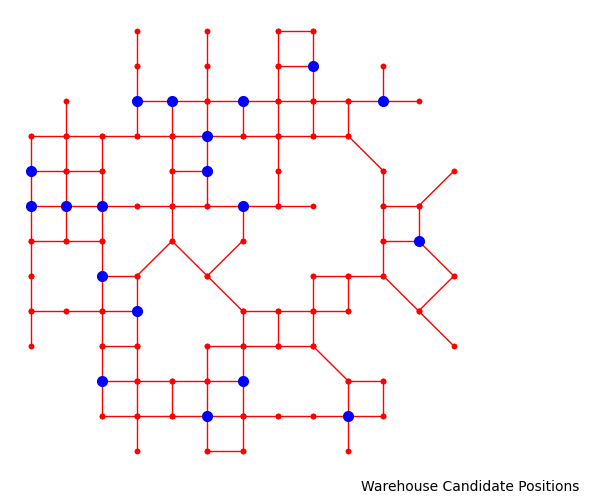

generating for day:  0 [5, 9, 21, 31, 32, 47, 48, 61, 71]
generating for day:  1 [2, 9, 11, 16, 19, 26, 30, 43, 57, 61, 62, 87, 88, 89, 96]
Simulate Delivery from Warehouse (6800,4000)
[ 0] 10:38:02.6 Parcel:   0 (  5) arr at delivery centre
[ 0] 11:11:36.0 Parcel:   1 (  9) arr at delivery centre
[ 0] 12:57:10.5 Parcel:   2 ( 21) arr at delivery centre
[ 0] 13:04:50.9 Parcel:   3 ( 31) arr at delivery centre
[ 0] 13:11:15.3 Parcel:   4 ( 32) arr at delivery centre
[ 0] 13:31:34.4 Parcel:   5 ( 47) arr at delivery centre
[ 0] 14:07:46.0 Parcel:   6 ( 48) arr at delivery centre
[ 0] 16:03:22.9 Parcel:   7 ( 61) arr at delivery centre
[ 0] 16:14:29.0 Parcel:   8 ( 71) arr at delivery centre
[ 0] 18:00:00.0 Driver arrives for work
[ 0] 18:00:00.0 Parcel:   8 ( 71) out for delivery
[ 0] 18:00:00.0 Parcel:   7 ( 61) out for delivery
[ 0] 18:00:00.0 Parcel:   6 ( 48) out for delivery
[ 0] 18:00:00.0 Parcel:   5 ( 47) out for delivery
[ 0] 18:00:00.0 Parcel:   0 (  5) out for delivery
[ 0] 18

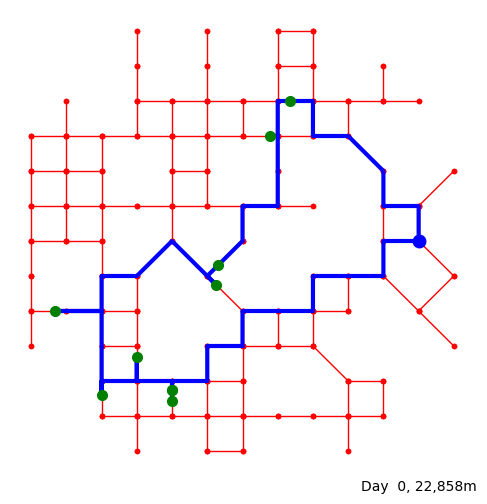

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer: 71 (4763, 6240)
[ 0] 18:23:17.5 Driver arrived at Customer: 71 (4763, 6240)
[ 0] 18:23:24.4 Customer: 71 (4763, 6240) answers door
[ 0] 18:23:24.4 Customer: 71 (4763, 6240) accepts Parcel:   8 ( 71)
[ 0] 18:23:32.3 Customer: 71 (4763, 6240) signs off
[ 0] 18:23:33.5 Driver drives to Customer: 61 (4430, 5680)
[ 0] 18:27:07.8 Driver arrived at Customer: 61 (4430, 5680)
[ 0] 18:28:15.1 Customer: 61 (4430, 5680) answers door
[ 0] 18:28:15.1 Customer: 61 (4430, 5680) accepts Parcel:   7 ( 61)
[ 0] 18:28:26.4 Customer: 61 (4430, 5680) signs off
[ 0] 18:28:28.6 Driver drives to Customer: 48 (3615, 3615)
[ 0] 18:40:07.9 Driver arrived at Customer: 48 (3615, 3615)
[ 0] 18:41:36.0 Customer: 48 (3615, 3615) answers door
[ 0] 18:41:36.0 Customer: 48 (3615, 3615) accepts Parcel:   6 ( 48)
[ 0] 18:41:39.0 Customer: 48 (3615, 3615) signs off
[ 0] 18:41:48.8 Driver drives to Customer: 47 (3578, 3301)
[ 0

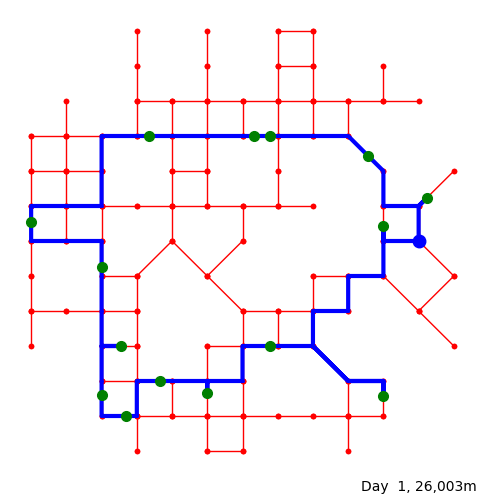

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer: 96 (6936, 4696)
[ 1] 18:15:30.4 Driver arrived at Customer: 96 (6936, 4696)
[ 1] 18:15:42.0 Customer: 96 (6936, 4696) answers door
[ 1] 18:15:42.0 Customer: 96 (6936, 4696) accepts Parcel:  23 ( 96)
[ 1] 18:15:43.0 Customer: 96 (6936, 4696) signs off
[ 1] 18:15:51.7 Driver drives to Customer: 87 (5999, 5360)
[ 1] 18:22:28.1 Driver arrived at Customer: 87 (5999, 5360)
[ 1] 18:22:30.0 Customer: 87 (5999, 5360) answers door
[ 1] 18:22:30.0 Customer: 87 (5999, 5360) accepts Parcel:  20 ( 87)
[ 1] 18:22:32.1 Customer: 87 (5999, 5360) signs off
[ 1] 18:22:39.7 Driver drives to Customer: 61 (4430, 5680)
[ 1] 18:29:27.9 Driver arrived at Customer: 61 (4430, 5680)
[ 1] 18:29:35.8 Customer: 61 (4430, 5680) answers door
[ 1] 18:29:35.8 Customer: 61 (4430, 5680) accepts Parcel:  18 ( 61)
[ 1] 18:29:50.0 Customer: 61 (4430, 5680) signs off
[ 1] 18:29:50.5 Driver drives to Customer: 57 (4185, 5680)
[ 

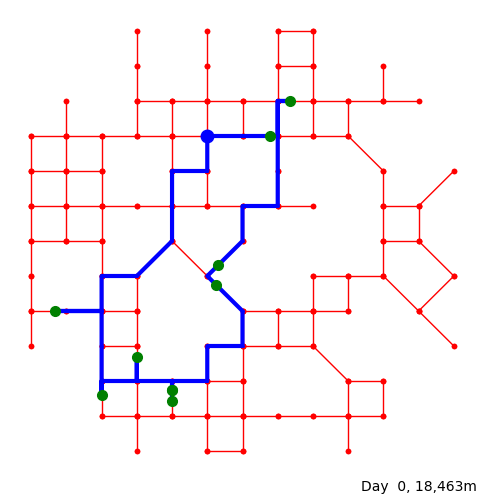

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer: 61 (4430, 5680)
[ 0] 18:11:27.5 Driver arrived at Customer: 61 (4430, 5680)
[ 0] 18:11:34.5 Customer: 61 (4430, 5680) answers door
[ 0] 18:11:34.5 Customer: 61 (4430, 5680) accepts Parcel:   7 ( 61)
[ 0] 18:11:42.4 Customer: 61 (4430, 5680) signs off
[ 0] 18:11:43.6 Driver drives to Customer: 71 (4763, 6240)
[ 0] 18:15:17.9 Driver arrived at Customer: 71 (4763, 6240)
[ 0] 18:16:25.2 Customer: 71 (4763, 6240) answers door
[ 0] 18:16:25.2 Customer: 71 (4763, 6240) accepts Parcel:   8 ( 71)
[ 0] 18:16:36.5 Customer: 71 (4763, 6240) signs off
[ 0] 18:16:38.6 Driver drives to Customer: 48 (3615, 3615)
[ 0] 18:30:49.9 Driver arrived at Customer: 48 (3615, 3615)
[ 0] 18:32:18.0 Customer: 48 (3615, 3615) answers door
[ 0] 18:32:18.0 Customer: 48 (3615, 3615) accepts Parcel:   6 ( 48)
[ 0] 18:32:21.0 Customer: 48 (3615, 3615) signs off
[ 0] 18:32:30.8 Driver drives to Customer: 47 (3578, 3301)
[ 0

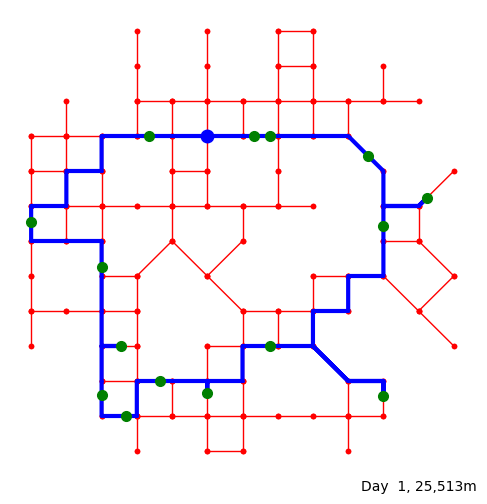

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer: 57 (4185, 5680)
[ 1] 18:15:28.7 Driver arrived at Customer: 57 (4185, 5680)
[ 1] 18:15:40.3 Customer: 57 (4185, 5680) answers door
[ 1] 18:15:40.3 Customer: 57 (4185, 5680) accepts Parcel:  17 ( 57)
[ 1] 18:15:41.4 Customer: 57 (4185, 5680) signs off
[ 1] 18:15:50.0 Driver drives to Customer: 61 (4430, 5680)
[ 1] 18:16:48.8 Driver arrived at Customer: 61 (4430, 5680)
[ 1] 18:16:50.6 Customer: 61 (4430, 5680) answers door
[ 1] 18:16:50.6 Customer: 61 (4430, 5680) accepts Parcel:  18 ( 61)
[ 1] 18:16:52.8 Customer: 61 (4430, 5680) signs off
[ 1] 18:17:00.3 Driver drives to Customer: 87 (5999, 5360)
[ 1] 18:23:48.6 Driver arrived at Customer: 87 (5999, 5360)
[ 1] 18:23:56.4 Customer: 87 (5999, 5360) answers door
[ 1] 18:23:56.4 Customer: 87 (5999, 5360) accepts Parcel:  20 ( 87)
[ 1] 18:24:10.6 Customer: 87 (5999, 5360) signs off
[ 1] 18:24:11.2 Driver drives to Customer: 96 (6936, 4696)
[ 

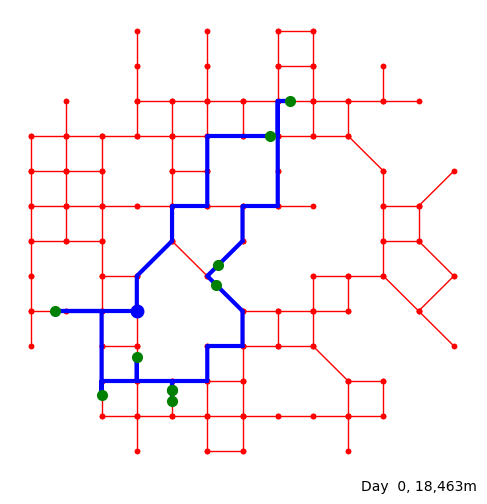

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer: 61 (4430, 5680)
[ 0] 18:25:49.4 Driver arrived at Customer: 61 (4430, 5680)
[ 0] 18:25:56.4 Customer: 61 (4430, 5680) answers door
[ 0] 18:25:56.4 Customer: 61 (4430, 5680) accepts Parcel:   7 ( 61)
[ 0] 18:26:04.2 Customer: 61 (4430, 5680) signs off
[ 0] 18:26:05.4 Driver drives to Customer: 71 (4763, 6240)
[ 0] 18:29:39.7 Driver arrived at Customer: 71 (4763, 6240)
[ 0] 18:30:47.0 Customer: 71 (4763, 6240) answers door
[ 0] 18:30:47.0 Customer: 71 (4763, 6240) accepts Parcel:   8 ( 71)
[ 0] 18:30:58.3 Customer: 71 (4763, 6240) signs off
[ 0] 18:31:00.5 Driver drives to Customer: 48 (3615, 3615)
[ 0] 18:45:11.8 Driver arrived at Customer: 48 (3615, 3615)
[ 0] 18:46:39.8 Customer: 48 (3615, 3615) answers door
[ 0] 18:46:39.8 Customer: 48 (3615, 3615) accepts Parcel:   6 ( 48)
[ 0] 18:46:42.8 Customer: 48 (3615, 3615) signs off
[ 0] 18:46:52.6 Driver drives to Customer: 47 (3578, 3301)
[ 0

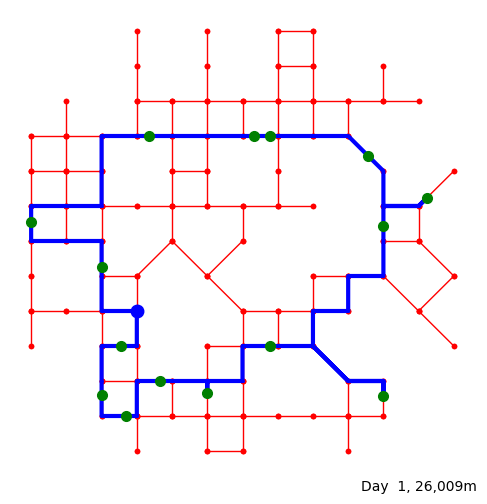

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer: 11 (1760, 3584)
[ 1] 18:17:33.3 Driver arrived at Customer: 11 (1760, 3584)
[ 1] 18:17:44.9 Customer: 11 (1760, 3584) answers door
[ 1] 18:17:44.9 Customer: 11 (1760, 3584) accepts Parcel:  11 ( 11)
[ 1] 18:17:45.9 Customer: 11 (1760, 3584) signs off
[ 1] 18:17:54.5 Driver drives to Customer:  2 (640, 4305)
[ 1] 18:25:16.4 Driver arrived at Customer:  2 (640, 4305)
[ 1] 18:25:18.2 Customer:  2 (640, 4305) answers door
[ 1] 18:25:18.2 Customer:  2 (640, 4305) accepts Parcel:   9 (  2)
[ 1] 18:25:20.4 Customer:  2 (640, 4305) signs off
[ 1] 18:25:27.9 Driver drives to Customer: 26 (2509, 5680)
[ 1] 18:38:26.5 Driver arrived at Customer: 26 (2509, 5680)
[ 1] 18:38:34.3 Customer: 26 (2509, 5680) answers door
[ 1] 18:38:34.3 Customer: 26 (2509, 5680) accepts Parcel:  14 ( 26)
[ 1] 18:38:48.5 Customer: 26 (2509, 5680) signs off
[ 1] 18:38:49.1 Driver drives to Customer: 57 (4185, 5680)
[ 1] 18

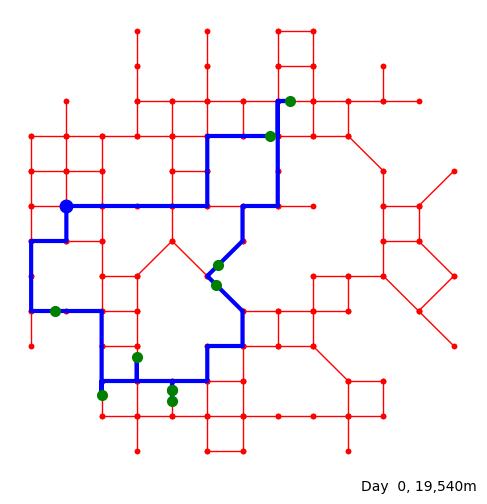

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer:  5 (1014, 2880)
[ 0] 18:17:57.3 Driver arrived at Customer:  5 (1014, 2880)
[ 0] 18:18:04.3 Customer:  5 (1014, 2880) answers door
[ 0] 18:18:04.3 Customer:  5 (1014, 2880) accepts Parcel:   0 (  5)
[ 0] 18:18:12.2 Customer:  5 (1014, 2880) signs off
[ 0] 18:18:13.3 Driver drives to Customer:  9 (1760, 1534)
[ 0] 18:26:35.4 Driver arrived at Customer:  9 (1760, 1534)
[ 0] 18:27:42.7 Customer:  9 (1760, 1534) answers door
[ 0] 18:27:42.7 Customer:  9 (1760, 1534) accepts Parcel:   1 (  9)
[ 0] 18:27:54.0 Customer:  9 (1760, 1534) signs off
[ 0] 18:27:56.2 Driver drives to Customer: 21 (2320, 2143)
[ 0] 18:32:36.7 Driver arrived at Customer: 21 (2320, 2143)
[ 0] 18:34:04.8 Customer: 21 (2320, 2143) answers door
[ 0] 18:34:04.8 Customer: 21 (2320, 2143) accepts Parcel:   2 ( 21)
[ 0] 18:34:07.8 Customer: 21 (2320, 2143) signs off
[ 0] 18:34:17.6 Driver drives to Customer: 32 (2880, 1618)
[ 0

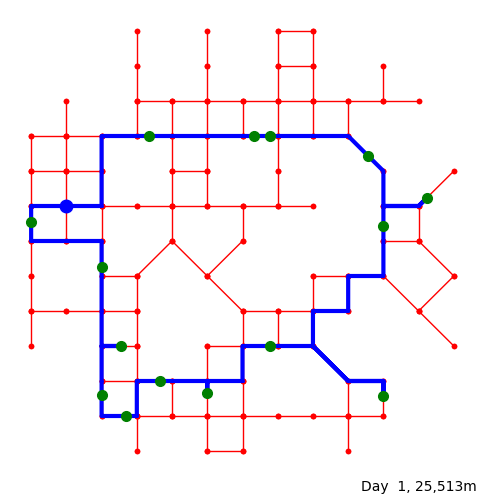

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer: 26 (2509, 5680)
[ 1] 18:22:12.9 Driver arrived at Customer: 26 (2509, 5680)
[ 1] 18:22:24.5 Customer: 26 (2509, 5680) answers door
[ 1] 18:22:24.5 Customer: 26 (2509, 5680) accepts Parcel:  14 ( 26)
[ 1] 18:22:25.5 Customer: 26 (2509, 5680) signs off
[ 1] 18:22:34.1 Driver drives to Customer: 57 (4185, 5680)
[ 1] 18:29:16.4 Driver arrived at Customer: 57 (4185, 5680)
[ 1] 18:29:18.2 Customer: 57 (4185, 5680) answers door
[ 1] 18:29:18.2 Customer: 57 (4185, 5680) accepts Parcel:  17 ( 57)
[ 1] 18:29:20.4 Customer: 57 (4185, 5680) signs off
[ 1] 18:29:27.9 Driver drives to Customer: 61 (4430, 5680)
[ 1] 18:30:26.7 Driver arrived at Customer: 61 (4430, 5680)
[ 1] 18:30:34.6 Customer: 61 (4430, 5680) answers door
[ 1] 18:30:34.6 Customer: 61 (4430, 5680) accepts Parcel:  18 ( 61)
[ 1] 18:30:48.8 Customer: 61 (4430, 5680) signs off
[ 1] 18:30:49.3 Driver drives to Customer: 87 (5999, 5360)
[ 

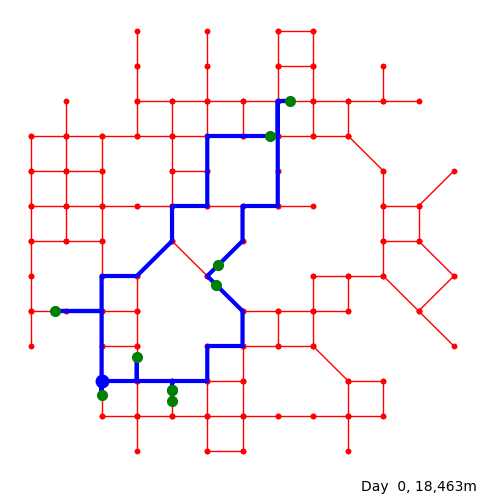

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer:  9 (1760, 1534)
[ 0] 18:08:24.2 Driver arrived at Customer:  9 (1760, 1534)
[ 0] 18:08:31.2 Customer:  9 (1760, 1534) answers door
[ 0] 18:08:31.2 Customer:  9 (1760, 1534) accepts Parcel:   1 (  9)
[ 0] 18:08:39.0 Customer:  9 (1760, 1534) signs off
[ 0] 18:08:40.2 Driver drives to Customer:  5 (1014, 2880)
[ 0] 18:17:02.3 Driver arrived at Customer:  5 (1014, 2880)
[ 0] 18:18:09.6 Customer:  5 (1014, 2880) answers door
[ 0] 18:18:09.6 Customer:  5 (1014, 2880) accepts Parcel:   0 (  5)
[ 0] 18:18:20.9 Customer:  5 (1014, 2880) signs off
[ 0] 18:18:23.0 Driver drives to Customer: 61 (4430, 5680)
[ 0] 18:41:55.9 Driver arrived at Customer: 61 (4430, 5680)
[ 0] 18:43:24.0 Customer: 61 (4430, 5680) answers door
[ 0] 18:43:24.0 Customer: 61 (4430, 5680) accepts Parcel:   7 ( 61)
[ 0] 18:43:27.0 Customer: 61 (4430, 5680) signs off
[ 0] 18:43:36.8 Driver drives to Customer: 71 (4763, 6240)
[ 0

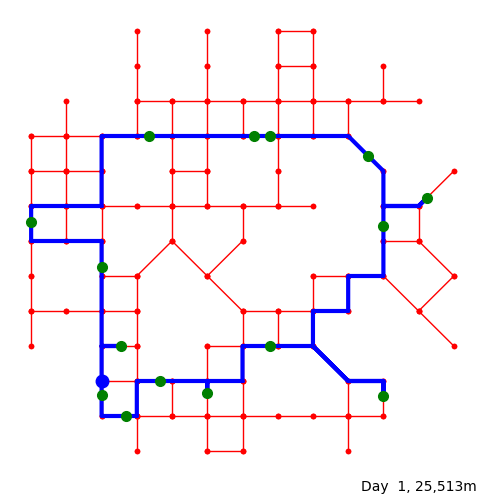

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer: 16 (2072, 2320)
[ 1] 18:15:59.2 Driver arrived at Customer: 16 (2072, 2320)
[ 1] 18:16:10.8 Customer: 16 (2072, 2320) answers door
[ 1] 18:16:10.8 Customer: 16 (2072, 2320) accepts Parcel:  12 ( 16)
[ 1] 18:16:11.8 Customer: 16 (2072, 2320) signs off
[ 1] 18:16:20.5 Driver drives to Customer: 11 (1760, 3584)
[ 1] 18:22:38.7 Driver arrived at Customer: 11 (1760, 3584)
[ 1] 18:22:40.5 Customer: 11 (1760, 3584) answers door
[ 1] 18:22:40.5 Customer: 11 (1760, 3584) accepts Parcel:  11 ( 11)
[ 1] 18:22:42.7 Customer: 11 (1760, 3584) signs off
[ 1] 18:22:50.3 Driver drives to Customer:  2 (640, 4305)
[ 1] 18:30:12.1 Driver arrived at Customer:  2 (640, 4305)
[ 1] 18:30:19.9 Customer:  2 (640, 4305) answers door
[ 1] 18:30:19.9 Customer:  2 (640, 4305) accepts Parcel:   9 (  2)
[ 1] 18:30:34.1 Customer:  2 (640, 4305) signs off
[ 1] 18:30:34.7 Driver drives to Customer: 26 (2509, 5680)
[ 1] 18

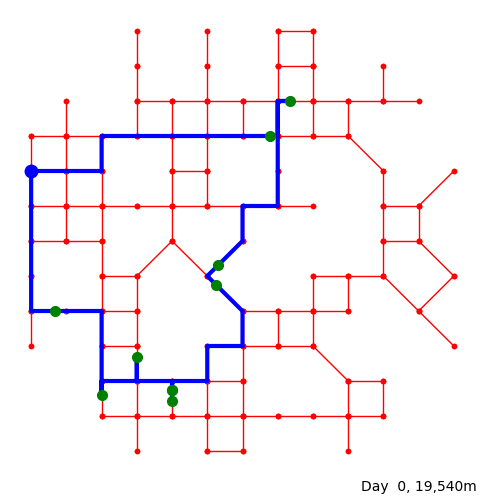

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer:  5 (1014, 2880)
[ 0] 18:17:57.3 Driver arrived at Customer:  5 (1014, 2880)
[ 0] 18:18:04.3 Customer:  5 (1014, 2880) answers door
[ 0] 18:18:04.3 Customer:  5 (1014, 2880) accepts Parcel:   0 (  5)
[ 0] 18:18:12.2 Customer:  5 (1014, 2880) signs off
[ 0] 18:18:13.3 Driver drives to Customer:  9 (1760, 1534)
[ 0] 18:26:35.4 Driver arrived at Customer:  9 (1760, 1534)
[ 0] 18:27:42.7 Customer:  9 (1760, 1534) answers door
[ 0] 18:27:42.7 Customer:  9 (1760, 1534) accepts Parcel:   1 (  9)
[ 0] 18:27:54.0 Customer:  9 (1760, 1534) signs off
[ 0] 18:27:56.2 Driver drives to Customer: 21 (2320, 2143)
[ 0] 18:32:36.7 Driver arrived at Customer: 21 (2320, 2143)
[ 0] 18:34:04.8 Customer: 21 (2320, 2143) answers door
[ 0] 18:34:04.8 Customer: 21 (2320, 2143) accepts Parcel:   2 ( 21)
[ 0] 18:34:07.8 Customer: 21 (2320, 2143) signs off
[ 0] 18:34:17.6 Driver drives to Customer: 32 (2880, 1618)
[ 0

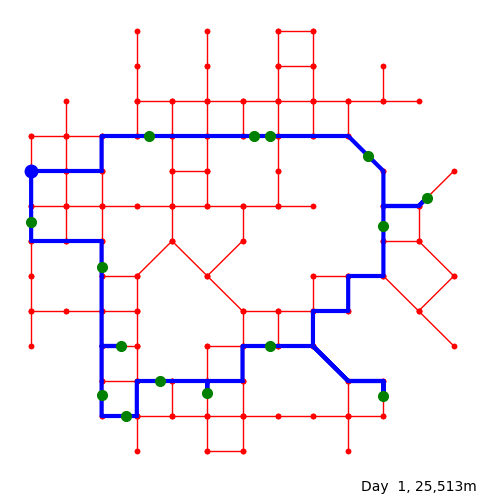

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer: 26 (2509, 5680)
[ 1] 18:22:12.9 Driver arrived at Customer: 26 (2509, 5680)
[ 1] 18:22:24.5 Customer: 26 (2509, 5680) answers door
[ 1] 18:22:24.5 Customer: 26 (2509, 5680) accepts Parcel:  14 ( 26)
[ 1] 18:22:25.5 Customer: 26 (2509, 5680) signs off
[ 1] 18:22:34.1 Driver drives to Customer: 57 (4185, 5680)
[ 1] 18:29:16.4 Driver arrived at Customer: 57 (4185, 5680)
[ 1] 18:29:18.2 Customer: 57 (4185, 5680) answers door
[ 1] 18:29:18.2 Customer: 57 (4185, 5680) accepts Parcel:  17 ( 57)
[ 1] 18:29:20.4 Customer: 57 (4185, 5680) signs off
[ 1] 18:29:27.9 Driver drives to Customer: 61 (4430, 5680)
[ 1] 18:30:26.7 Driver arrived at Customer: 61 (4430, 5680)
[ 1] 18:30:34.6 Customer: 61 (4430, 5680) answers door
[ 1] 18:30:34.6 Customer: 61 (4430, 5680) accepts Parcel:  18 ( 61)
[ 1] 18:30:48.8 Customer: 61 (4430, 5680) signs off
[ 1] 18:30:49.3 Driver drives to Customer: 87 (5999, 5360)
[ 

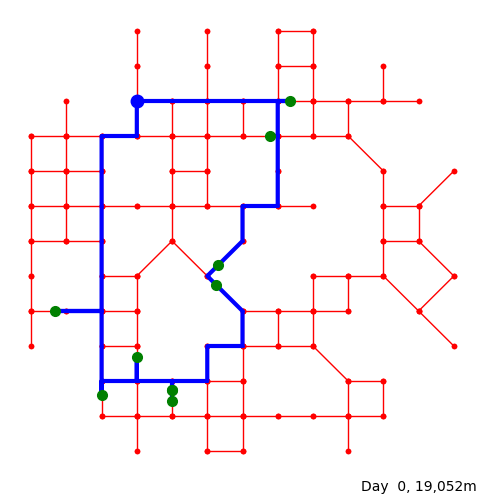

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer:  5 (1014, 2880)
[ 0] 18:26:09.8 Driver arrived at Customer:  5 (1014, 2880)
[ 0] 18:26:16.8 Customer:  5 (1014, 2880) answers door
[ 0] 18:26:16.8 Customer:  5 (1014, 2880) accepts Parcel:   0 (  5)
[ 0] 18:26:24.6 Customer:  5 (1014, 2880) signs off
[ 0] 18:26:25.8 Driver drives to Customer:  9 (1760, 1534)
[ 0] 18:34:47.9 Driver arrived at Customer:  9 (1760, 1534)
[ 0] 18:35:55.2 Customer:  9 (1760, 1534) answers door
[ 0] 18:35:55.2 Customer:  9 (1760, 1534) accepts Parcel:   1 (  9)
[ 0] 18:36:06.5 Customer:  9 (1760, 1534) signs off
[ 0] 18:36:08.6 Driver drives to Customer: 21 (2320, 2143)
[ 0] 18:40:49.2 Driver arrived at Customer: 21 (2320, 2143)
[ 0] 18:42:17.3 Customer: 21 (2320, 2143) answers door
[ 0] 18:42:17.3 Customer: 21 (2320, 2143) accepts Parcel:   2 ( 21)
[ 0] 18:42:20.2 Customer: 21 (2320, 2143) signs off
[ 0] 18:42:30.1 Driver drives to Customer: 32 (2880, 1618)
[ 0

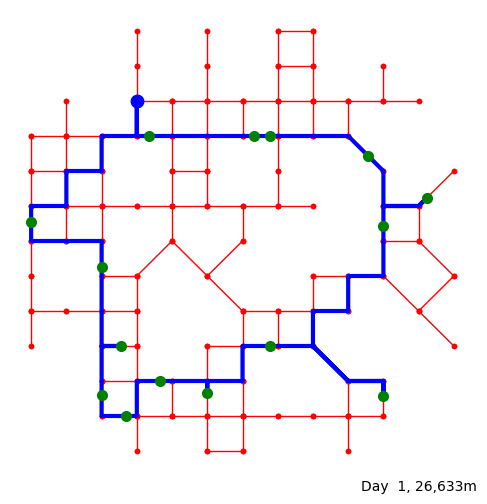

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer:  2 (640, 4305)
[ 1] 18:26:57.5 Driver arrived at Customer:  2 (640, 4305)
[ 1] 18:27:09.1 Customer:  2 (640, 4305) answers door
[ 1] 18:27:09.1 Customer:  2 (640, 4305) accepts Parcel:   9 (  2)
[ 1] 18:27:10.2 Customer:  2 (640, 4305) signs off
[ 1] 18:27:18.8 Driver drives to Customer: 11 (1760, 3584)
[ 1] 18:34:40.6 Driver arrived at Customer: 11 (1760, 3584)
[ 1] 18:34:42.5 Customer: 11 (1760, 3584) answers door
[ 1] 18:34:42.5 Customer: 11 (1760, 3584) accepts Parcel:  11 ( 11)
[ 1] 18:34:44.6 Customer: 11 (1760, 3584) signs off
[ 1] 18:34:52.2 Driver drives to Customer: 16 (2072, 2320)
[ 1] 18:41:10.4 Driver arrived at Customer: 16 (2072, 2320)
[ 1] 18:41:18.2 Customer: 16 (2072, 2320) answers door
[ 1] 18:41:18.2 Customer: 16 (2072, 2320) accepts Parcel:  12 ( 16)
[ 1] 18:41:32.5 Customer: 16 (2072, 2320) signs off
[ 1] 18:41:33.0 Driver drives to Customer:  9 (1760, 1534)
[ 1] 18

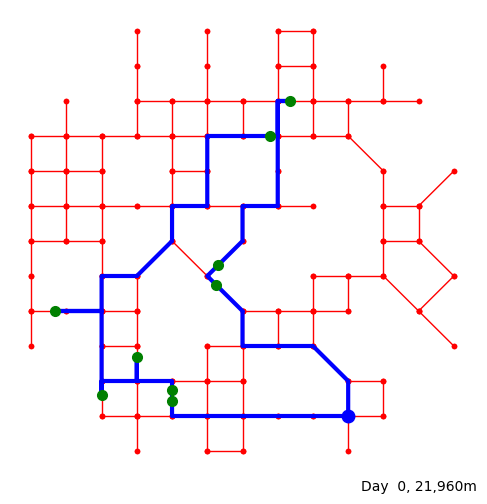

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer: 31 (2880, 1433)
[ 0] 18:19:37.9 Driver arrived at Customer: 31 (2880, 1433)
[ 0] 18:19:44.8 Customer: 31 (2880, 1433) answers door
[ 0] 18:19:44.8 Customer: 31 (2880, 1433) accepts Parcel:   3 ( 31)
[ 0] 18:19:52.7 Customer: 31 (2880, 1433) signs off
[ 0] 18:19:53.9 Driver drives to Customer: 32 (2880, 1618)
[ 0] 18:20:38.3 Driver arrived at Customer: 32 (2880, 1618)
[ 0] 18:21:45.6 Customer: 32 (2880, 1618) answers door
[ 0] 18:21:45.6 Customer: 32 (2880, 1618) accepts Parcel:   4 ( 32)
[ 0] 18:21:56.9 Customer: 32 (2880, 1618) signs off
[ 0] 18:21:59.0 Driver drives to Customer: 21 (2320, 2143)
[ 0] 18:26:19.4 Driver arrived at Customer: 21 (2320, 2143)
[ 0] 18:27:47.5 Customer: 21 (2320, 2143) answers door
[ 0] 18:27:47.5 Customer: 21 (2320, 2143) accepts Parcel:   2 ( 21)
[ 0] 18:27:50.5 Customer: 21 (2320, 2143) signs off
[ 0] 18:28:00.3 Driver drives to Customer:  9 (1760, 1534)
[ 0

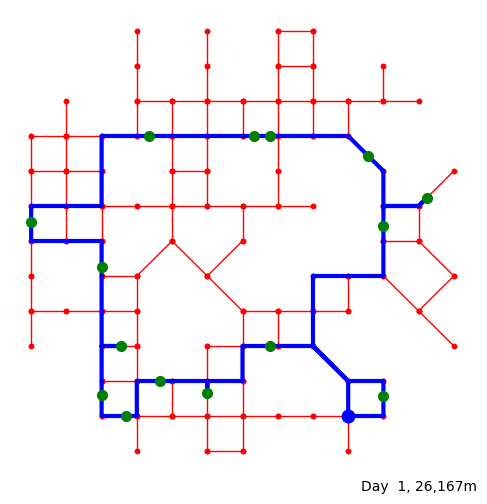

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer: 88 (6240, 1527)
[ 1] 18:16:02.8 Driver arrived at Customer: 88 (6240, 1527)
[ 1] 18:16:14.4 Customer: 88 (6240, 1527) answers door
[ 1] 18:16:14.4 Customer: 88 (6240, 1527) accepts Parcel:  21 ( 88)
[ 1] 18:16:15.4 Customer: 88 (6240, 1527) signs off
[ 1] 18:16:24.1 Driver drives to Customer: 62 (4442, 2320)
[ 1] 18:25:26.9 Driver arrived at Customer: 62 (4442, 2320)
[ 1] 18:25:28.8 Customer: 62 (4442, 2320) answers door
[ 1] 18:25:28.8 Customer: 62 (4442, 2320) accepts Parcel:  19 ( 62)
[ 1] 18:25:30.9 Customer: 62 (4442, 2320) signs off
[ 1] 18:25:38.5 Driver drives to Customer: 43 (3440, 1567)
[ 1] 18:32:39.7 Driver arrived at Customer: 43 (3440, 1567)
[ 1] 18:32:47.5 Customer: 43 (3440, 1567) answers door
[ 1] 18:32:47.5 Customer: 43 (3440, 1567) accepts Parcel:  16 ( 43)
[ 1] 18:33:01.7 Customer: 43 (3440, 1567) signs off
[ 1] 18:33:02.3 Driver drives to Customer: 30 (2682, 1760)
[ 

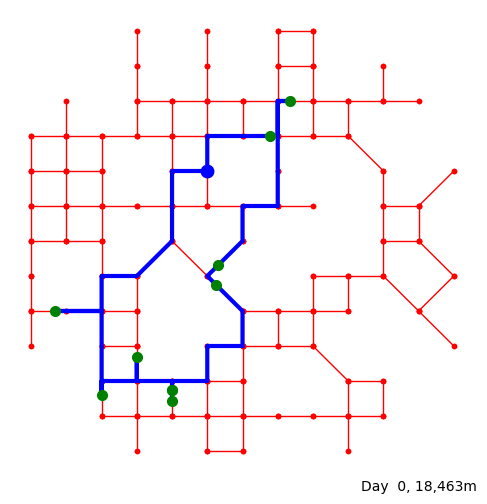

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer: 61 (4430, 5680)
[ 0] 18:13:42.0 Driver arrived at Customer: 61 (4430, 5680)
[ 0] 18:13:48.9 Customer: 61 (4430, 5680) answers door
[ 0] 18:13:48.9 Customer: 61 (4430, 5680) accepts Parcel:   7 ( 61)
[ 0] 18:13:56.8 Customer: 61 (4430, 5680) signs off
[ 0] 18:13:58.0 Driver drives to Customer: 71 (4763, 6240)
[ 0] 18:17:32.3 Driver arrived at Customer: 71 (4763, 6240)
[ 0] 18:18:39.6 Customer: 71 (4763, 6240) answers door
[ 0] 18:18:39.6 Customer: 71 (4763, 6240) accepts Parcel:   8 ( 71)
[ 0] 18:18:50.9 Customer: 71 (4763, 6240) signs off
[ 0] 18:18:53.0 Driver drives to Customer: 48 (3615, 3615)
[ 0] 18:33:04.3 Driver arrived at Customer: 48 (3615, 3615)
[ 0] 18:34:32.4 Customer: 48 (3615, 3615) answers door
[ 0] 18:34:32.4 Customer: 48 (3615, 3615) accepts Parcel:   6 ( 48)
[ 0] 18:34:35.4 Customer: 48 (3615, 3615) signs off
[ 0] 18:34:45.2 Driver drives to Customer: 47 (3578, 3301)
[ 0

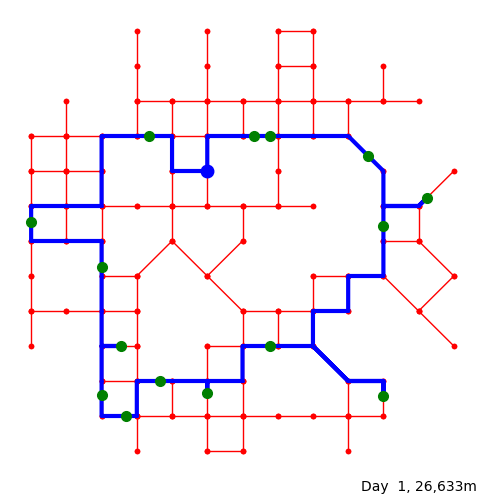

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer: 57 (4185, 5680)
[ 1] 18:17:43.1 Driver arrived at Customer: 57 (4185, 5680)
[ 1] 18:17:54.7 Customer: 57 (4185, 5680) answers door
[ 1] 18:17:54.7 Customer: 57 (4185, 5680) accepts Parcel:  17 ( 57)
[ 1] 18:17:55.8 Customer: 57 (4185, 5680) signs off
[ 1] 18:18:04.4 Driver drives to Customer: 61 (4430, 5680)
[ 1] 18:19:03.2 Driver arrived at Customer: 61 (4430, 5680)
[ 1] 18:19:05.0 Customer: 61 (4430, 5680) answers door
[ 1] 18:19:05.0 Customer: 61 (4430, 5680) accepts Parcel:  18 ( 61)
[ 1] 18:19:07.2 Customer: 61 (4430, 5680) signs off
[ 1] 18:19:14.7 Driver drives to Customer: 87 (5999, 5360)
[ 1] 18:26:03.0 Driver arrived at Customer: 87 (5999, 5360)
[ 1] 18:26:10.8 Customer: 87 (5999, 5360) answers door
[ 1] 18:26:10.8 Customer: 87 (5999, 5360) accepts Parcel:  20 ( 87)
[ 1] 18:26:25.0 Customer: 87 (5999, 5360) signs off
[ 1] 18:26:25.6 Driver drives to Customer: 96 (6936, 4696)
[ 

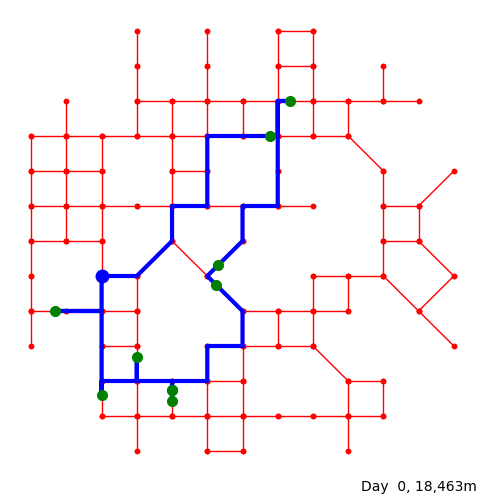

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer:  5 (1014, 2880)
[ 0] 18:12:43.4 Driver arrived at Customer:  5 (1014, 2880)
[ 0] 18:12:50.4 Customer:  5 (1014, 2880) answers door
[ 0] 18:12:50.4 Customer:  5 (1014, 2880) accepts Parcel:   0 (  5)
[ 0] 18:12:58.2 Customer:  5 (1014, 2880) signs off
[ 0] 18:12:59.4 Driver drives to Customer:  9 (1760, 1534)
[ 0] 18:21:21.5 Driver arrived at Customer:  9 (1760, 1534)
[ 0] 18:22:28.8 Customer:  9 (1760, 1534) answers door
[ 0] 18:22:28.8 Customer:  9 (1760, 1534) accepts Parcel:   1 (  9)
[ 0] 18:22:40.1 Customer:  9 (1760, 1534) signs off
[ 0] 18:22:42.2 Driver drives to Customer: 21 (2320, 2143)
[ 0] 18:27:22.8 Driver arrived at Customer: 21 (2320, 2143)
[ 0] 18:28:50.9 Customer: 21 (2320, 2143) answers door
[ 0] 18:28:50.9 Customer: 21 (2320, 2143) accepts Parcel:   2 ( 21)
[ 0] 18:28:53.8 Customer: 21 (2320, 2143) signs off
[ 0] 18:29:03.7 Driver drives to Customer: 32 (2880, 1618)
[ 0

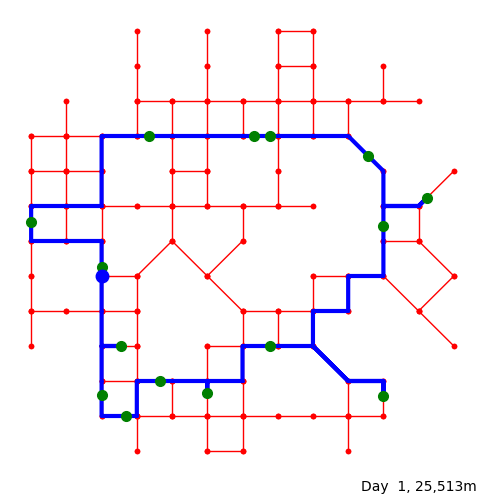

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer: 11 (1760, 3584)
[ 1] 18:13:04.5 Driver arrived at Customer: 11 (1760, 3584)
[ 1] 18:13:16.1 Customer: 11 (1760, 3584) answers door
[ 1] 18:13:16.1 Customer: 11 (1760, 3584) accepts Parcel:  11 ( 11)
[ 1] 18:13:17.1 Customer: 11 (1760, 3584) signs off
[ 1] 18:13:25.7 Driver drives to Customer:  2 (640, 4305)
[ 1] 18:20:47.6 Driver arrived at Customer:  2 (640, 4305)
[ 1] 18:20:49.4 Customer:  2 (640, 4305) answers door
[ 1] 18:20:49.4 Customer:  2 (640, 4305) accepts Parcel:   9 (  2)
[ 1] 18:20:51.6 Customer:  2 (640, 4305) signs off
[ 1] 18:20:59.1 Driver drives to Customer: 26 (2509, 5680)
[ 1] 18:33:57.7 Driver arrived at Customer: 26 (2509, 5680)
[ 1] 18:34:05.5 Customer: 26 (2509, 5680) answers door
[ 1] 18:34:05.5 Customer: 26 (2509, 5680) accepts Parcel:  14 ( 26)
[ 1] 18:34:19.7 Customer: 26 (2509, 5680) signs off
[ 1] 18:34:20.3 Driver drives to Customer: 57 (4185, 5680)
[ 1] 18

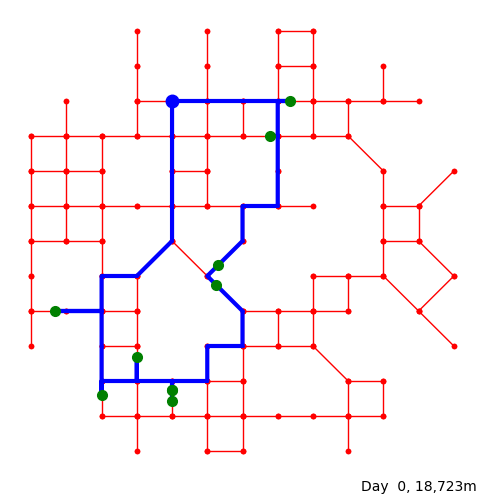

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer:  5 (1014, 2880)
[ 0] 18:27:05.2 Driver arrived at Customer:  5 (1014, 2880)
[ 0] 18:27:12.2 Customer:  5 (1014, 2880) answers door
[ 0] 18:27:12.2 Customer:  5 (1014, 2880) accepts Parcel:   0 (  5)
[ 0] 18:27:20.1 Customer:  5 (1014, 2880) signs off
[ 0] 18:27:21.3 Driver drives to Customer:  9 (1760, 1534)
[ 0] 18:35:43.3 Driver arrived at Customer:  9 (1760, 1534)
[ 0] 18:36:50.6 Customer:  9 (1760, 1534) answers door
[ 0] 18:36:50.6 Customer:  9 (1760, 1534) accepts Parcel:   1 (  9)
[ 0] 18:37:01.9 Customer:  9 (1760, 1534) signs off
[ 0] 18:37:04.1 Driver drives to Customer: 21 (2320, 2143)
[ 0] 18:41:44.6 Driver arrived at Customer: 21 (2320, 2143)
[ 0] 18:43:12.7 Customer: 21 (2320, 2143) answers door
[ 0] 18:43:12.7 Customer: 21 (2320, 2143) accepts Parcel:   2 ( 21)
[ 0] 18:43:15.7 Customer: 21 (2320, 2143) signs off
[ 0] 18:43:25.5 Driver drives to Customer: 32 (2880, 1618)
[ 0

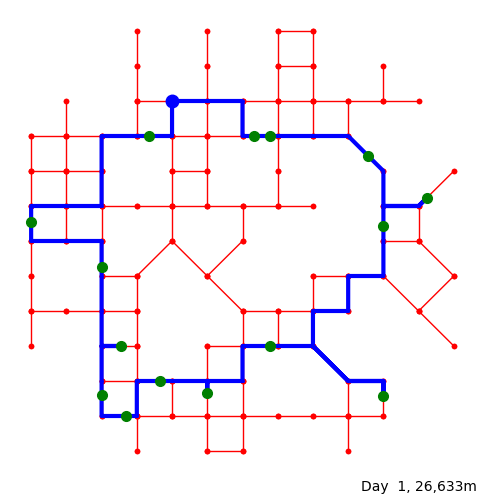

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer: 26 (2509, 5680)
[ 1] 18:16:13.4 Driver arrived at Customer: 26 (2509, 5680)
[ 1] 18:16:25.0 Customer: 26 (2509, 5680) answers door
[ 1] 18:16:25.0 Customer: 26 (2509, 5680) accepts Parcel:  14 ( 26)
[ 1] 18:16:26.0 Customer: 26 (2509, 5680) signs off
[ 1] 18:16:34.6 Driver drives to Customer:  2 (640, 4305)
[ 1] 18:29:33.2 Driver arrived at Customer:  2 (640, 4305)
[ 1] 18:29:35.0 Customer:  2 (640, 4305) answers door
[ 1] 18:29:35.0 Customer:  2 (640, 4305) accepts Parcel:   9 (  2)
[ 1] 18:29:37.2 Customer:  2 (640, 4305) signs off
[ 1] 18:29:44.7 Driver drives to Customer: 11 (1760, 3584)
[ 1] 18:37:06.6 Driver arrived at Customer: 11 (1760, 3584)
[ 1] 18:37:14.4 Customer: 11 (1760, 3584) answers door
[ 1] 18:37:14.4 Customer: 11 (1760, 3584) accepts Parcel:  11 ( 11)
[ 1] 18:37:28.6 Customer: 11 (1760, 3584) signs off
[ 1] 18:37:29.2 Driver drives to Customer: 16 (2072, 2320)
[ 1] 18

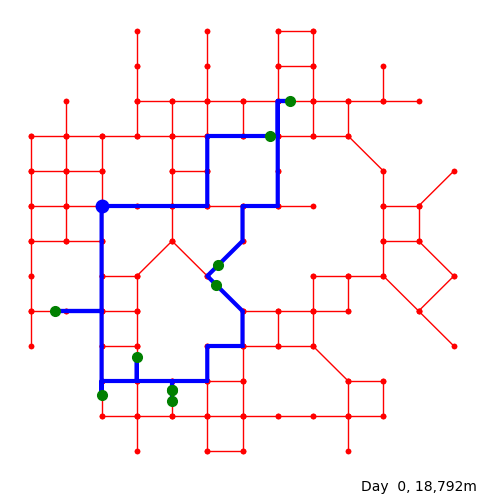

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer:  5 (1014, 2880)
[ 0] 18:17:12.2 Driver arrived at Customer:  5 (1014, 2880)
[ 0] 18:17:19.2 Customer:  5 (1014, 2880) answers door
[ 0] 18:17:19.2 Customer:  5 (1014, 2880) accepts Parcel:   0 (  5)
[ 0] 18:17:27.0 Customer:  5 (1014, 2880) signs off
[ 0] 18:17:28.2 Driver drives to Customer:  9 (1760, 1534)
[ 0] 18:25:50.3 Driver arrived at Customer:  9 (1760, 1534)
[ 0] 18:26:57.6 Customer:  9 (1760, 1534) answers door
[ 0] 18:26:57.6 Customer:  9 (1760, 1534) accepts Parcel:   1 (  9)
[ 0] 18:27:08.9 Customer:  9 (1760, 1534) signs off
[ 0] 18:27:11.0 Driver drives to Customer: 21 (2320, 2143)
[ 0] 18:31:51.6 Driver arrived at Customer: 21 (2320, 2143)
[ 0] 18:33:19.7 Customer: 21 (2320, 2143) answers door
[ 0] 18:33:19.7 Customer: 21 (2320, 2143) accepts Parcel:   2 ( 21)
[ 0] 18:33:22.6 Customer: 21 (2320, 2143) signs off
[ 0] 18:33:32.5 Driver drives to Customer: 32 (2880, 1618)
[ 0

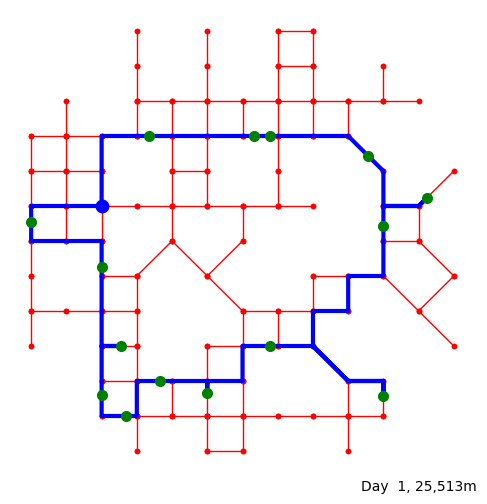

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer:  2 (640, 4305)
[ 1] 18:18:00.0 Driver arrived at Customer:  2 (640, 4305)
[ 1] 18:18:11.5 Customer:  2 (640, 4305) answers door
[ 1] 18:18:11.5 Customer:  2 (640, 4305) accepts Parcel:   9 (  2)
[ 1] 18:18:12.6 Customer:  2 (640, 4305) signs off
[ 1] 18:18:21.2 Driver drives to Customer: 11 (1760, 3584)
[ 1] 18:25:43.0 Driver arrived at Customer: 11 (1760, 3584)
[ 1] 18:25:44.9 Customer: 11 (1760, 3584) answers door
[ 1] 18:25:44.9 Customer: 11 (1760, 3584) accepts Parcel:  11 ( 11)
[ 1] 18:25:47.0 Customer: 11 (1760, 3584) signs off
[ 1] 18:25:54.6 Driver drives to Customer: 16 (2072, 2320)
[ 1] 18:32:12.8 Driver arrived at Customer: 16 (2072, 2320)
[ 1] 18:32:20.6 Customer: 16 (2072, 2320) answers door
[ 1] 18:32:20.6 Customer: 16 (2072, 2320) accepts Parcel:  12 ( 16)
[ 1] 18:32:34.9 Customer: 16 (2072, 2320) signs off
[ 1] 18:32:35.4 Driver drives to Customer:  9 (1760, 1534)
[ 1] 18

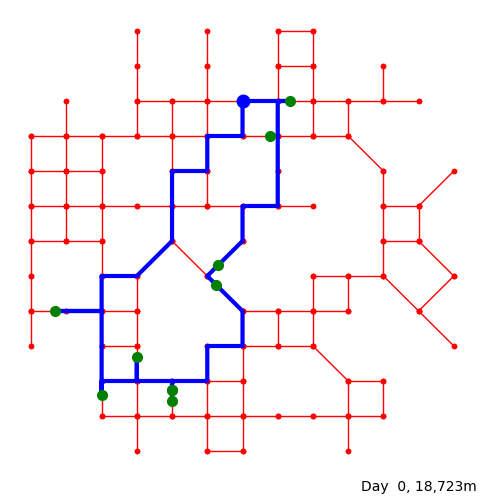

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer:  5 (1014, 2880)
[ 0] 18:31:34.0 Driver arrived at Customer:  5 (1014, 2880)
[ 0] 18:31:41.0 Customer:  5 (1014, 2880) answers door
[ 0] 18:31:41.0 Customer:  5 (1014, 2880) accepts Parcel:   0 (  5)
[ 0] 18:31:48.9 Customer:  5 (1014, 2880) signs off
[ 0] 18:31:50.1 Driver drives to Customer:  9 (1760, 1534)
[ 0] 18:40:12.1 Driver arrived at Customer:  9 (1760, 1534)
[ 0] 18:41:19.4 Customer:  9 (1760, 1534) answers door
[ 0] 18:41:19.4 Customer:  9 (1760, 1534) accepts Parcel:   1 (  9)
[ 0] 18:41:30.7 Customer:  9 (1760, 1534) signs off
[ 0] 18:41:32.9 Driver drives to Customer: 21 (2320, 2143)
[ 0] 18:46:13.4 Driver arrived at Customer: 21 (2320, 2143)
[ 0] 18:47:41.5 Customer: 21 (2320, 2143) answers door
[ 0] 18:47:41.5 Customer: 21 (2320, 2143) accepts Parcel:   2 ( 21)
[ 0] 18:47:44.5 Customer: 21 (2320, 2143) signs off
[ 0] 18:47:54.3 Driver drives to Customer: 32 (2880, 1618)
[ 0

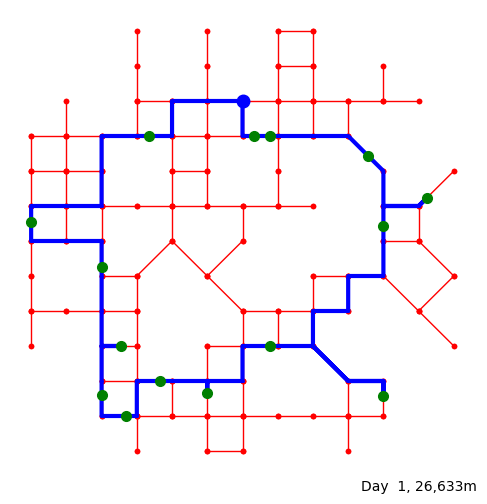

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer: 57 (4185, 5680)
[ 1] 18:15:28.7 Driver arrived at Customer: 57 (4185, 5680)
[ 1] 18:15:40.3 Customer: 57 (4185, 5680) answers door
[ 1] 18:15:40.3 Customer: 57 (4185, 5680) accepts Parcel:  17 ( 57)
[ 1] 18:15:41.4 Customer: 57 (4185, 5680) signs off
[ 1] 18:15:50.0 Driver drives to Customer: 61 (4430, 5680)
[ 1] 18:16:48.8 Driver arrived at Customer: 61 (4430, 5680)
[ 1] 18:16:50.6 Customer: 61 (4430, 5680) answers door
[ 1] 18:16:50.6 Customer: 61 (4430, 5680) accepts Parcel:  18 ( 61)
[ 1] 18:16:52.8 Customer: 61 (4430, 5680) signs off
[ 1] 18:17:00.3 Driver drives to Customer: 87 (5999, 5360)
[ 1] 18:23:48.6 Driver arrived at Customer: 87 (5999, 5360)
[ 1] 18:23:56.4 Customer: 87 (5999, 5360) answers door
[ 1] 18:23:56.4 Customer: 87 (5999, 5360) accepts Parcel:  20 ( 87)
[ 1] 18:24:10.6 Customer: 87 (5999, 5360) signs off
[ 1] 18:24:11.2 Driver drives to Customer: 96 (6936, 4696)
[ 

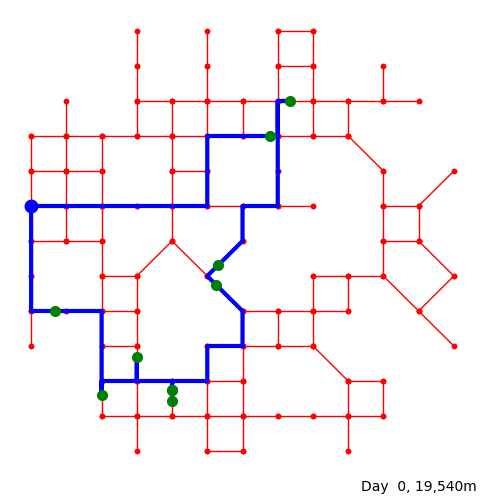

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer: 61 (4430, 5680)
[ 0] 18:27:08.3 Driver arrived at Customer: 61 (4430, 5680)
[ 0] 18:27:15.3 Customer: 61 (4430, 5680) answers door
[ 0] 18:27:15.3 Customer: 61 (4430, 5680) accepts Parcel:   7 ( 61)
[ 0] 18:27:23.2 Customer: 61 (4430, 5680) signs off
[ 0] 18:27:24.4 Driver drives to Customer: 71 (4763, 6240)
[ 0] 18:30:58.7 Driver arrived at Customer: 71 (4763, 6240)
[ 0] 18:32:06.0 Customer: 71 (4763, 6240) answers door
[ 0] 18:32:06.0 Customer: 71 (4763, 6240) accepts Parcel:   8 ( 71)
[ 0] 18:32:17.3 Customer: 71 (4763, 6240) signs off
[ 0] 18:32:19.4 Driver drives to Customer: 48 (3615, 3615)
[ 0] 18:46:30.7 Driver arrived at Customer: 48 (3615, 3615)
[ 0] 18:47:58.8 Customer: 48 (3615, 3615) answers door
[ 0] 18:47:58.8 Customer: 48 (3615, 3615) accepts Parcel:   6 ( 48)
[ 0] 18:48:01.8 Customer: 48 (3615, 3615) signs off
[ 0] 18:48:11.6 Driver drives to Customer: 47 (3578, 3301)
[ 0

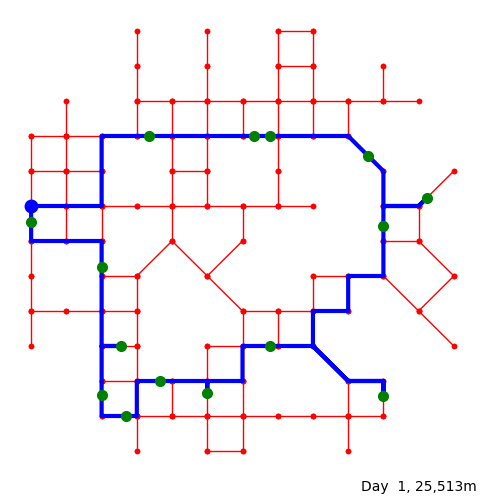

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer: 26 (2509, 5680)
[ 1] 18:24:27.3 Driver arrived at Customer: 26 (2509, 5680)
[ 1] 18:24:38.9 Customer: 26 (2509, 5680) answers door
[ 1] 18:24:38.9 Customer: 26 (2509, 5680) accepts Parcel:  14 ( 26)
[ 1] 18:24:39.9 Customer: 26 (2509, 5680) signs off
[ 1] 18:24:48.5 Driver drives to Customer: 57 (4185, 5680)
[ 1] 18:31:30.8 Driver arrived at Customer: 57 (4185, 5680)
[ 1] 18:31:32.6 Customer: 57 (4185, 5680) answers door
[ 1] 18:31:32.6 Customer: 57 (4185, 5680) accepts Parcel:  17 ( 57)
[ 1] 18:31:34.8 Customer: 57 (4185, 5680) signs off
[ 1] 18:31:42.3 Driver drives to Customer: 61 (4430, 5680)
[ 1] 18:32:41.1 Driver arrived at Customer: 61 (4430, 5680)
[ 1] 18:32:49.0 Customer: 61 (4430, 5680) answers door
[ 1] 18:32:49.0 Customer: 61 (4430, 5680) accepts Parcel:  18 ( 61)
[ 1] 18:33:03.2 Customer: 61 (4430, 5680) signs off
[ 1] 18:33:03.7 Driver drives to Customer: 87 (5999, 5360)
[ 

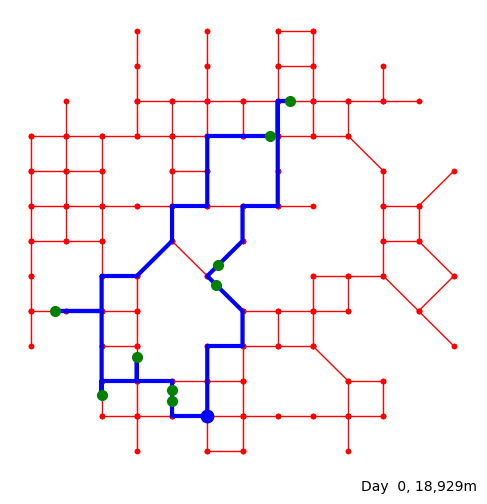

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer: 31 (2880, 1433)
[ 0] 18:10:40.3 Driver arrived at Customer: 31 (2880, 1433)
[ 0] 18:10:47.2 Customer: 31 (2880, 1433) answers door
[ 0] 18:10:47.2 Customer: 31 (2880, 1433) accepts Parcel:   3 ( 31)
[ 0] 18:10:55.1 Customer: 31 (2880, 1433) signs off
[ 0] 18:10:56.3 Driver drives to Customer: 32 (2880, 1618)
[ 0] 18:11:40.7 Driver arrived at Customer: 32 (2880, 1618)
[ 0] 18:12:48.0 Customer: 32 (2880, 1618) answers door
[ 0] 18:12:48.0 Customer: 32 (2880, 1618) accepts Parcel:   4 ( 32)
[ 0] 18:12:59.3 Customer: 32 (2880, 1618) signs off
[ 0] 18:13:01.4 Driver drives to Customer: 21 (2320, 2143)
[ 0] 18:17:21.8 Driver arrived at Customer: 21 (2320, 2143)
[ 0] 18:18:49.9 Customer: 21 (2320, 2143) answers door
[ 0] 18:18:49.9 Customer: 21 (2320, 2143) accepts Parcel:   2 ( 21)
[ 0] 18:18:52.9 Customer: 21 (2320, 2143) signs off
[ 0] 18:19:02.7 Driver drives to Customer:  9 (1760, 1534)
[ 0

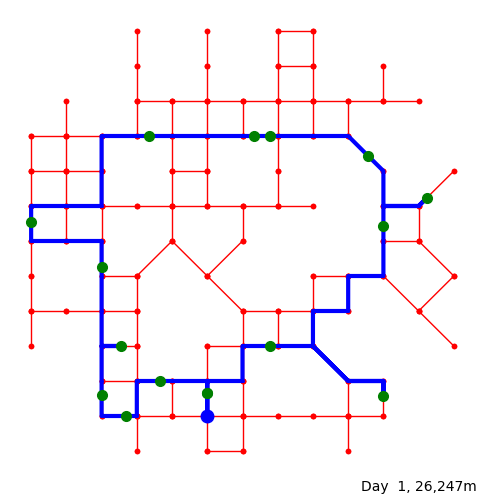

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer: 43 (3440, 1567)
[ 1] 18:13:58.0 Driver arrived at Customer: 43 (3440, 1567)
[ 1] 18:14:09.6 Customer: 43 (3440, 1567) answers door
[ 1] 18:14:09.6 Customer: 43 (3440, 1567) accepts Parcel:  16 ( 43)
[ 1] 18:14:10.6 Customer: 43 (3440, 1567) signs off
[ 1] 18:14:19.3 Driver drives to Customer: 30 (2682, 1760)
[ 1] 18:18:07.5 Driver arrived at Customer: 30 (2682, 1760)
[ 1] 18:18:09.3 Customer: 30 (2682, 1760) answers door
[ 1] 18:18:09.3 Customer: 30 (2682, 1760) accepts Parcel:  15 ( 30)
[ 1] 18:18:11.5 Customer: 30 (2682, 1760) signs off
[ 1] 18:18:19.1 Driver drives to Customer: 19 (2150, 1200)
[ 1] 18:22:41.1 Driver arrived at Customer: 19 (2150, 1200)
[ 1] 18:22:49.0 Customer: 19 (2150, 1200) answers door
[ 1] 18:22:49.0 Customer: 19 (2150, 1200) accepts Parcel:  13 ( 19)
[ 1] 18:23:03.2 Customer: 19 (2150, 1200) signs off
[ 1] 18:23:03.7 Driver drives to Customer:  9 (1760, 1534)
[ 

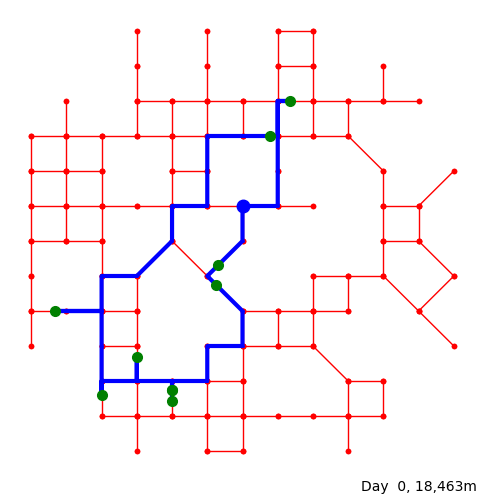

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer: 48 (3615, 3615)
[ 0] 18:11:54.9 Driver arrived at Customer: 48 (3615, 3615)
[ 0] 18:12:01.9 Customer: 48 (3615, 3615) answers door
[ 0] 18:12:01.9 Customer: 48 (3615, 3615) accepts Parcel:   6 ( 48)
[ 0] 18:12:09.8 Customer: 48 (3615, 3615) signs off
[ 0] 18:12:10.9 Driver drives to Customer: 47 (3578, 3301)
[ 0] 18:13:57.0 Driver arrived at Customer: 47 (3578, 3301)
[ 0] 18:15:04.3 Customer: 47 (3578, 3301) answers door
[ 0] 18:15:04.3 Customer: 47 (3578, 3301) accepts Parcel:   5 ( 47)
[ 0] 18:15:15.6 Customer: 47 (3578, 3301) signs off
[ 0] 18:15:17.8 Driver drives to Customer: 32 (2880, 1618)
[ 0] 18:27:12.5 Driver arrived at Customer: 32 (2880, 1618)
[ 0] 18:28:40.6 Customer: 32 (2880, 1618) answers door
[ 0] 18:28:40.6 Customer: 32 (2880, 1618) accepts Parcel:   4 ( 32)
[ 0] 18:28:43.5 Customer: 32 (2880, 1618) signs off
[ 0] 18:28:53.4 Driver drives to Customer: 31 (2880, 1433)
[ 0

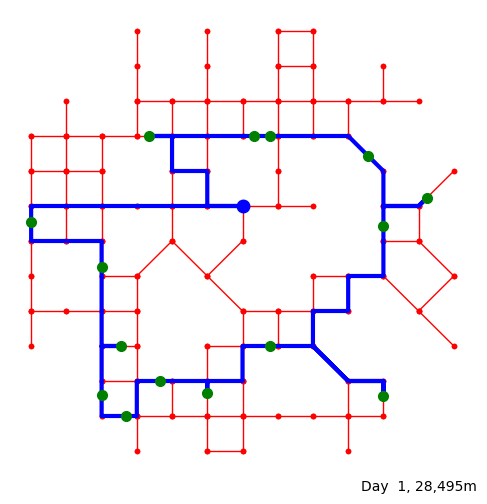

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer: 26 (2509, 5680)
[ 1] 18:22:56.6 Driver arrived at Customer: 26 (2509, 5680)
[ 1] 18:23:08.2 Customer: 26 (2509, 5680) answers door
[ 1] 18:23:08.2 Customer: 26 (2509, 5680) accepts Parcel:  14 ( 26)
[ 1] 18:23:09.2 Customer: 26 (2509, 5680) signs off
[ 1] 18:23:17.8 Driver drives to Customer: 57 (4185, 5680)
[ 1] 18:30:00.1 Driver arrived at Customer: 57 (4185, 5680)
[ 1] 18:30:01.9 Customer: 57 (4185, 5680) answers door
[ 1] 18:30:01.9 Customer: 57 (4185, 5680) accepts Parcel:  17 ( 57)
[ 1] 18:30:04.1 Customer: 57 (4185, 5680) signs off
[ 1] 18:30:11.6 Driver drives to Customer: 61 (4430, 5680)
[ 1] 18:31:10.4 Driver arrived at Customer: 61 (4430, 5680)
[ 1] 18:31:18.2 Customer: 61 (4430, 5680) answers door
[ 1] 18:31:18.2 Customer: 61 (4430, 5680) accepts Parcel:  18 ( 61)
[ 1] 18:31:32.5 Customer: 61 (4430, 5680) signs off
[ 1] 18:31:33.0 Driver drives to Customer: 87 (5999, 5360)
[ 

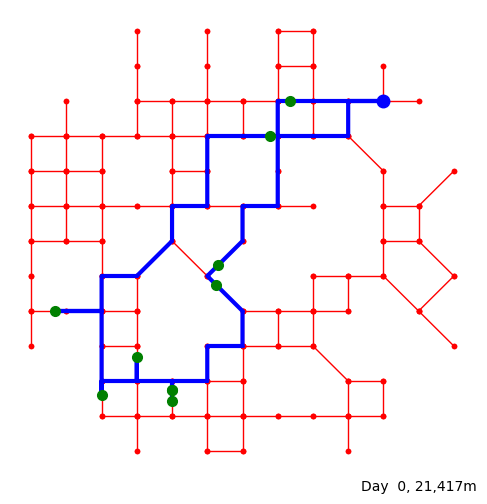

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer: 71 (4763, 6240)
[ 0] 18:13:24.4 Driver arrived at Customer: 71 (4763, 6240)
[ 0] 18:13:31.4 Customer: 71 (4763, 6240) answers door
[ 0] 18:13:31.4 Customer: 71 (4763, 6240) accepts Parcel:   8 ( 71)
[ 0] 18:13:39.3 Customer: 71 (4763, 6240) signs off
[ 0] 18:13:40.5 Driver drives to Customer: 61 (4430, 5680)
[ 0] 18:17:14.8 Driver arrived at Customer: 61 (4430, 5680)
[ 0] 18:18:22.1 Customer: 61 (4430, 5680) answers door
[ 0] 18:18:22.1 Customer: 61 (4430, 5680) accepts Parcel:   7 ( 61)
[ 0] 18:18:33.4 Customer: 61 (4430, 5680) signs off
[ 0] 18:18:35.5 Driver drives to Customer:  5 (1014, 2880)
[ 0] 18:42:08.4 Driver arrived at Customer:  5 (1014, 2880)
[ 0] 18:43:36.5 Customer:  5 (1014, 2880) answers door
[ 0] 18:43:36.5 Customer:  5 (1014, 2880) accepts Parcel:   0 (  5)
[ 0] 18:43:39.4 Customer:  5 (1014, 2880) signs off
[ 0] 18:43:49.3 Driver drives to Customer:  9 (1760, 1534)
[ 0

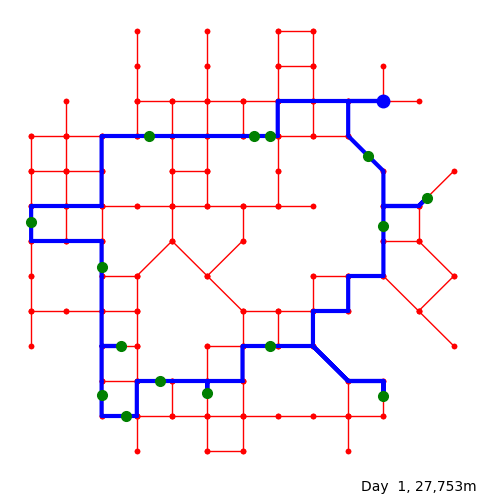

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer: 87 (5999, 5360)
[ 1] 18:18:47.0 Driver arrived at Customer: 87 (5999, 5360)
[ 1] 18:18:58.6 Customer: 87 (5999, 5360) answers door
[ 1] 18:18:58.6 Customer: 87 (5999, 5360) accepts Parcel:  20 ( 87)
[ 1] 18:18:59.6 Customer: 87 (5999, 5360) signs off
[ 1] 18:19:08.2 Driver drives to Customer: 96 (6936, 4696)
[ 1] 18:25:44.7 Driver arrived at Customer: 96 (6936, 4696)
[ 1] 18:25:46.5 Customer: 96 (6936, 4696) answers door
[ 1] 18:25:46.5 Customer: 96 (6936, 4696) accepts Parcel:  23 ( 96)
[ 1] 18:25:48.7 Customer: 96 (6936, 4696) signs off
[ 1] 18:25:56.3 Driver drives to Customer: 89 (6240, 4245)
[ 1] 18:30:12.3 Driver arrived at Customer: 89 (6240, 4245)
[ 1] 18:30:20.2 Customer: 89 (6240, 4245) answers door
[ 1] 18:30:20.2 Customer: 89 (6240, 4245) accepts Parcel:  22 ( 89)
[ 1] 18:30:34.4 Customer: 89 (6240, 4245) signs off
[ 1] 18:30:34.9 Driver drives to Customer: 88 (6240, 1527)
[ 

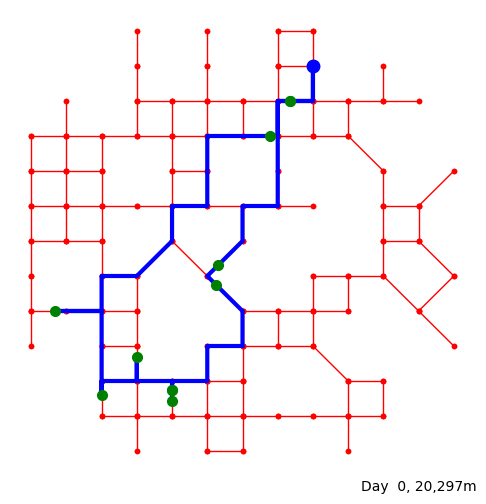

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer: 71 (4763, 6240)
[ 0] 18:11:10.0 Driver arrived at Customer: 71 (4763, 6240)
[ 0] 18:11:17.0 Customer: 71 (4763, 6240) answers door
[ 0] 18:11:17.0 Customer: 71 (4763, 6240) accepts Parcel:   8 ( 71)
[ 0] 18:11:24.9 Customer: 71 (4763, 6240) signs off
[ 0] 18:11:26.1 Driver drives to Customer: 61 (4430, 5680)
[ 0] 18:15:00.4 Driver arrived at Customer: 61 (4430, 5680)
[ 0] 18:16:07.7 Customer: 61 (4430, 5680) answers door
[ 0] 18:16:07.7 Customer: 61 (4430, 5680) accepts Parcel:   7 ( 61)
[ 0] 18:16:19.0 Customer: 61 (4430, 5680) signs off
[ 0] 18:16:21.1 Driver drives to Customer:  5 (1014, 2880)
[ 0] 18:39:54.0 Driver arrived at Customer:  5 (1014, 2880)
[ 0] 18:41:22.1 Customer:  5 (1014, 2880) answers door
[ 0] 18:41:22.1 Customer:  5 (1014, 2880) accepts Parcel:   0 (  5)
[ 0] 18:41:25.0 Customer:  5 (1014, 2880) signs off
[ 0] 18:41:34.9 Driver drives to Customer:  9 (1760, 1534)
[ 0

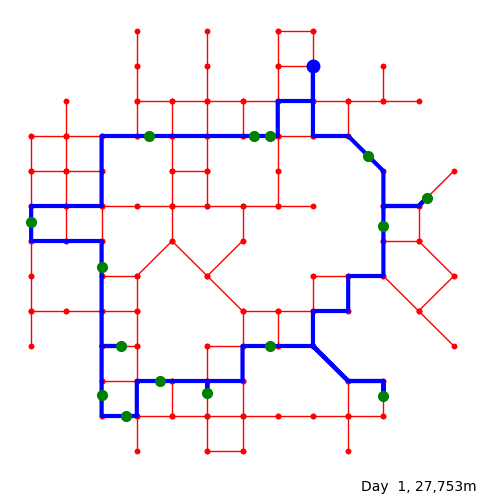

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer: 87 (5999, 5360)
[ 1] 18:21:01.4 Driver arrived at Customer: 87 (5999, 5360)
[ 1] 18:21:13.0 Customer: 87 (5999, 5360) answers door
[ 1] 18:21:13.0 Customer: 87 (5999, 5360) accepts Parcel:  20 ( 87)
[ 1] 18:21:14.0 Customer: 87 (5999, 5360) signs off
[ 1] 18:21:22.6 Driver drives to Customer: 96 (6936, 4696)
[ 1] 18:27:59.1 Driver arrived at Customer: 96 (6936, 4696)
[ 1] 18:28:00.9 Customer: 96 (6936, 4696) answers door
[ 1] 18:28:00.9 Customer: 96 (6936, 4696) accepts Parcel:  23 ( 96)
[ 1] 18:28:03.1 Customer: 96 (6936, 4696) signs off
[ 1] 18:28:10.7 Driver drives to Customer: 89 (6240, 4245)
[ 1] 18:32:26.7 Driver arrived at Customer: 89 (6240, 4245)
[ 1] 18:32:34.6 Customer: 89 (6240, 4245) answers door
[ 1] 18:32:34.6 Customer: 89 (6240, 4245) accepts Parcel:  22 ( 89)
[ 1] 18:32:48.8 Customer: 89 (6240, 4245) signs off
[ 1] 18:32:49.3 Driver drives to Customer: 88 (6240, 1527)
[ 

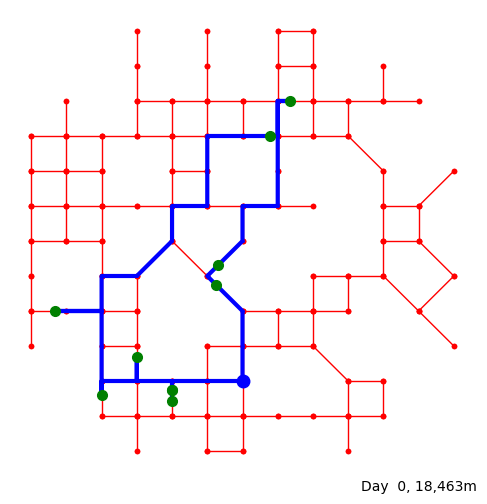

[ 0] 18:07:30.0 Driver leaves for delivery of 9 parcels
[ 0] 18:07:30.0 Driver drives to Customer: 32 (2880, 1618)
[ 0] 18:12:32.8 Driver arrived at Customer: 32 (2880, 1618)
[ 0] 18:12:39.8 Customer: 32 (2880, 1618) answers door
[ 0] 18:12:39.8 Customer: 32 (2880, 1618) accepts Parcel:   4 ( 32)
[ 0] 18:12:47.7 Customer: 32 (2880, 1618) signs off
[ 0] 18:12:48.9 Driver drives to Customer: 31 (2880, 1433)
[ 0] 18:13:33.3 Driver arrived at Customer: 31 (2880, 1433)
[ 0] 18:14:40.6 Customer: 31 (2880, 1433) answers door
[ 0] 18:14:40.6 Customer: 31 (2880, 1433) accepts Parcel:   3 ( 31)
[ 0] 18:14:51.9 Customer: 31 (2880, 1433) signs off
[ 0] 18:14:54.0 Driver drives to Customer: 21 (2320, 2143)
[ 0] 18:19:58.8 Driver arrived at Customer: 21 (2320, 2143)
[ 0] 18:21:26.9 Customer: 21 (2320, 2143) answers door
[ 0] 18:21:26.9 Customer: 21 (2320, 2143) accepts Parcel:   2 ( 21)
[ 0] 18:21:29.8 Customer: 21 (2320, 2143) signs off
[ 0] 18:21:39.7 Driver drives to Customer:  9 (1760, 1534)
[ 0

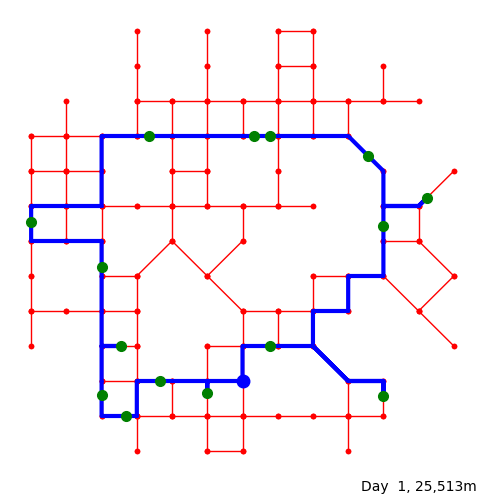

[ 1] 18:12:30.0 Driver leaves for delivery of 15 parcels
[ 1] 18:12:30.0 Driver drives to Customer: 62 (4442, 2320)
[ 1] 18:16:30.4 Driver arrived at Customer: 62 (4442, 2320)
[ 1] 18:16:42.0 Customer: 62 (4442, 2320) answers door
[ 1] 18:16:42.0 Customer: 62 (4442, 2320) accepts Parcel:  19 ( 62)
[ 1] 18:16:43.0 Customer: 62 (4442, 2320) signs off
[ 1] 18:16:51.7 Driver drives to Customer: 88 (6240, 1527)
[ 1] 18:25:54.5 Driver arrived at Customer: 88 (6240, 1527)
[ 1] 18:25:56.4 Customer: 88 (6240, 1527) answers door
[ 1] 18:25:56.4 Customer: 88 (6240, 1527) accepts Parcel:  21 ( 88)
[ 1] 18:25:58.5 Customer: 88 (6240, 1527) signs off
[ 1] 18:26:06.1 Driver drives to Customer: 89 (6240, 4245)
[ 1] 18:44:37.1 Driver arrived at Customer: 89 (6240, 4245)
[ 1] 18:44:44.9 Customer: 89 (6240, 4245) answers door
[ 1] 18:44:44.9 Customer: 89 (6240, 4245) accepts Parcel:  22 ( 89)
[ 1] 18:44:59.1 Customer: 89 (6240, 4245) signs off
[ 1] 18:44:59.6 Driver drives to Customer: 96 (6936, 4696)
[ 

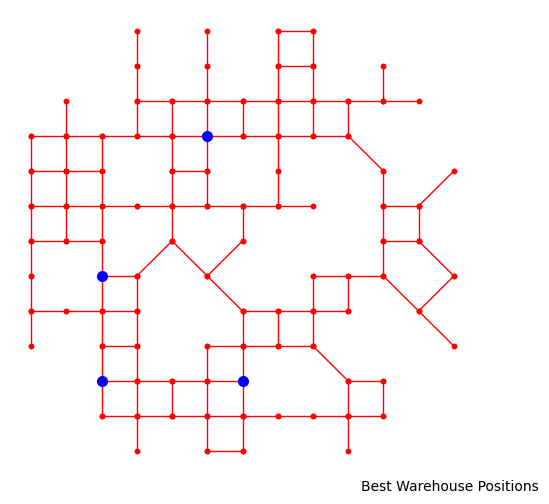

In [64]:
import pickle

with open('data.pickled', 'rb') as f:
    M, C = pickle.load(f)

def generateWarehouseLocations(M, p):

    def numberOfEdges(v, E):
        count = 0
        for e in E:
            if e[0]==v or e[1]==v:
                count += 1
        return count

    V, E = M
    W = [ v for v in V if numberOfEdges(v, E)>2 ]
    return random.sample(W, k=int(round(len(W)*p)))

def formatLocation(w):
    return f"({w[0]:4d},{w[1]:4d})"
    
def objectiveFunction(w, seed=4144):
    random.seed(seed)
    title = "Simulate Delivery from Warehouse "+formatLocation(w)
    rec = simulation(M, w, C, p=0.15, days=2, title=title, log= True,plot= True)
    filename = "2_/rec w="+formatLocation(w)+".pickled"
    with open(filename, 'wb') as f:
            pickle.dump(rec, f)
    return rec.statsTourLength()[0] # mean tour length

def monteCarlo(M, p):

    W = generateWarehouseLocations(M, p)
    plotMap(M, T=W, styleT='bo', msT=7, 
            text="Warehouse Candidate Positions")

    minW, minP = None, math.inf
    for w in W:
        f = objectiveFunction(w)
        if f < minP:
            print(f"  improved position:   {formatLocation(w):s} f={f:7.2f}")
            minW, minP = [w], f
        elif f == minP:
            print(f"  equivalent position: {formatLocation(w):s} f={f:7.2f}")
            minW.append(w)
            
    return minW

random.seed(4144)
W = monteCarlo(M, 0.28)
plotMap(M, T=W, styleT='bo', msT=7, text='Best Warehouse Positions')

In [53]:
W1 = [((4000,1760))]

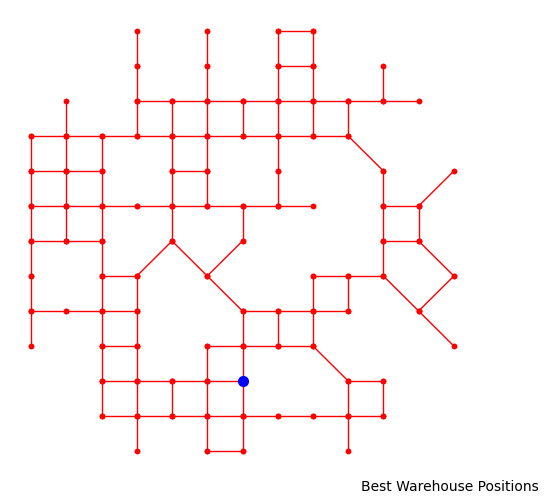

In [54]:
plotMap(M, T=W1, styleT='bo', msT=7, text='Best Warehouse Positions')

In [55]:
import pickle
with open('_/W.pickled', 'wb') as f:
    pickle.dump(W, f)

# Optimization for 10 days

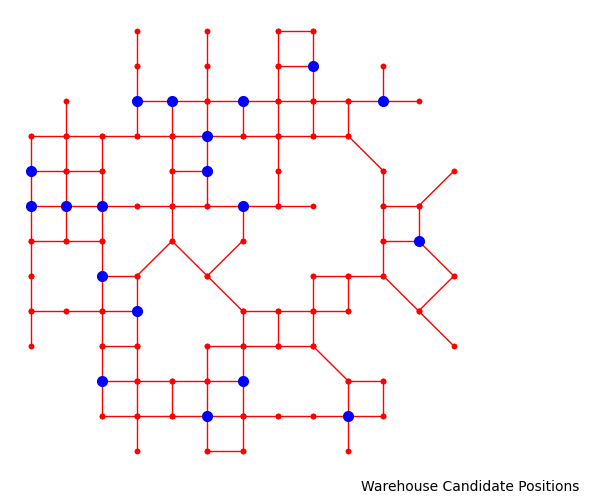

Simulate Delivery from Warehouse (6800,4000)
  improved position:   (6800,4000) f=33240.70
Simulate Delivery from Warehouse (3440,5680)


KeyboardInterrupt: 

In [33]:
import pickle

with open('data.pickled', 'rb') as f:
    M, C = pickle.load(f)

def generateWarehouseLocations(M, p):

    def numberOfEdges(v, E):
        count = 0
        for e in E:
            if e[0]==v or e[1]==v:
                count += 1
        return count

    V, E = M
    W = [ v for v in V if numberOfEdges(v, E)>2 ]
    return random.sample(W, k=int(round(len(W)*p)))

def formatLocation(w):
    return f"({w[0]:4d},{w[1]:4d})"
    
def objectiveFunction(w, seed=4144):
    random.seed(seed)
    title = "Simulate Delivery from Warehouse "+formatLocation(w)
    rec = simulation(M, w, C, p=0.15, days=10, title=title)
    filename = "_/rec w="+formatLocation(w)+".pickled"
    with open(filename, 'wb') as f:
            pickle.dump(rec, f)
    return rec.statsTourLength()[0] # mean tour length

def monteCarlo(M, p):

    W = generateWarehouseLocations(M, p)
    plotMap(M, T=W, styleT='bo', msT=7, 
            text="Warehouse Candidate Positions")

    minW, minP = None, math.inf
    for w in W:
        f = objectiveFunction(w)
        if f < minP:
            print(f"  improved position:   {formatLocation(w):s} f={f:7.2f}")
            minW, minP = [w], f
        elif f == minP:
            print(f"  equivalent position: {formatLocation(w):s} f={f:7.2f}")
            minW.append(w)
            
    return minW

random.seed(4144)
W1 = monteCarlo(M, 0.28)
plotMap(M, T=W1, styleT='bo', msT=7, text='Best Warehouse Positions')

In [ ]:
import pickle
with open('W1.pickled', 'wb') as f:
    pickle.dump(W1, f)

In [ ]:
import pickle

with open('data.pickled', 'rb') as f:
    M, C = pickle.load(f)
    
W = generateWarehouseLocations(M, 0.28)

In [ ]:
W

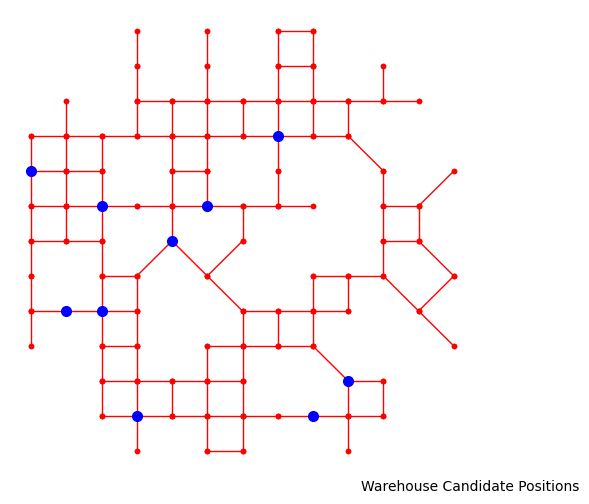

Simulate Delivery from Warehouse (5680,1760)
Simulate Delivery from Warehouse (4560,5680)
Simulate Delivery from Warehouse (2880,4000)
Simulate Delivery from Warehouse (1760,4560)
Simulate Delivery from Warehouse ( 640,5120)
Simulate Delivery from Warehouse (1760,2880)
Simulate Delivery from Warehouse (1200,2880)
Simulate Delivery from Warehouse (3440,4560)
Simulate Delivery from Warehouse (5120,1200)
Simulate Delivery from Warehouse (2320,1200)


In [72]:
import pickle
import datetime

with open('data.pickled', 'rb') as f:
    M, C = pickle.load(f)

def generateWarehouseLocations(M):
    
    random.seed(4144)
    V, _ = M
    W = random.sample(V, k=len(V)//10)
    return W

#     def numberOfEdges(v, E):
#         count = 0
#         for e in E:
#             if e[0]==v or e[1]==v:
#                 count += 1
#         return count

#     V, E = M
#     W = [ v for v in V if numberOfEdges(v, E)>2 ]
#     return random.sample(W, k=int(round(len(W)*p)))

def formatLocation(w):
    return f"({w[0]:4d},{w[1]:4d})"
    
def objectiveFunction(w, seed=4144):
    random.seed(seed)
    title = "Simulate Delivery from Warehouse "+formatLocation(w)
    rec = simulation(M, w, C, p=0.15, days=30, title=title)
    filename = "100C_10W/rec w="+formatLocation(w)+".pickled"
    with open(filename, 'wb') as f:
            pickle.dump(rec, f)
    return rec.statsTourLength()[0] # mean tour length

def monteCarlo(M):

    W = generateWarehouseLocations(M)
    plotMap(M, T=W, styleT='bo', msT=7, 
            text="Warehouse Candidate Positions")

    for w in W:
        f = objectiveFunction(w)
            

random.seed(4144)
monteCarlo(M)

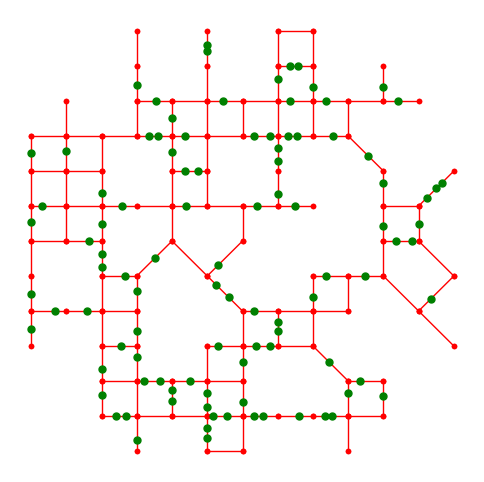

In [56]:
import pickle

with open('data.pickled', 'rb') as f:
    M, C = pickle.load(f)
V,E = M
plotMap((V, E), T=C)


In [ ]:
import pickle

with open('REC/rec w=( 640,5120).pickled', 'rb') as f:
    rec = pickle.load(f)

In [ ]:
type(rec)

In [ ]:
rec.daily['dist']

In [ ]:
rec.daily['left']

In [ ]:
rec.daily['left']

In [ ]:
rec.daily['working time']

In [ ]:
rec.histWorkingTime()
rec.plotWorkingTime()

In [ ]:
rec.reportTimer()

In [ ]:
import os

def print_files_in_directory(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            rec = pickle.load(file)

# Replace 'directory_path' with the path of the directory you want to search
directory_path = 'REC/'
print_files_in_directory(directory_path)


In [ ]:
import os
import pandas as pd
import pickle

df = pd.DataFrame()

for root, dirs, files in os.walk("REC/"):
    for file in files:
        with open(os.path.join(root, file), 'rb') as f:
            rec = pickle.load(f)
        df['working time'] = rec.daily['working time']
        df['left'] = rec.daily['left']
        df['dist'] = rec.daily['dist']



def load_data_from_pickle(df, directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            with open(os.path.join(root, file), 'rb') as f:
                rec = pickle.load(f)
                df['working time'] = rec.daily['working time']
                df['left'] = rec.daily['left']
                df['dist'] = rec.daily['dist']
            

#  Replace 'directory_path' with the path of the directory containing the pickle files
directory_path = "REC/"

load_data_from_pickle(df, directory_path)


# # Convert the list of dictionaries into a pandas DataFrame
# df = pd.DataFrame(pickle_data)

# Now df contains all the data from the pickle files in a pandas DataFrame


In [175]:
import os
import pandas as pd
import pickle

def load_rec_data(directory):
    # Initialize an empty list to store DataFrame objects
    dfs = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            with open(os.path.join(root, file), 'rb') as f:
                rec = pickle.load(f)


            # Create a new DataFrame for each file
            temp_df = pd.DataFrame({
                'working time': rec.daily['working time'],
                'left': rec.daily['left'],
                'dist': rec.daily['dist']
            })
            temp_df['working time hours'] = temp_df['working time'] / 60
            # Calculate working time cost
            temp_df['working time cost'] = temp_df['working time hours'].apply(lambda x: max(60, x * 30))
            # Convert distance from meters to kilometers
            temp_df['dist km'] = temp_df['dist'] / 1000
            # Calculate distance cost
            temp_df['dist cost'] = temp_df['dist km'] * 0.08
            # Calculate total cost
            temp_df['total cost'] = temp_df['working time cost'] + temp_df['dist cost']


            # Append the DataFrame to the list
            dfs.append(temp_df)

    # Concatenate all DataFrames in the list into one DataFrame
    df = pd.concat(dfs, ignore_index=True)
    return dfs

In [104]:
from scipy.stats import f_oneway
def anova_cal_9(dfs):    
    f_statistic, p_value = f_oneway(dfs[0]["total cost"], dfs[1]["total cost"], dfs[2]["total cost"], dfs[3]["total cost"],
        dfs[4]["total cost"], dfs[5]["total cost"], dfs[6]["total cost"], dfs[7]["total cost"],
        dfs[8]["total cost"])
    return f_statistic, p_value

def anova_cal_10(dfs):    
    f_statistic, p_value = f_oneway(dfs[0]["total cost"], dfs[1]["total cost"], dfs[2]["total cost"], dfs[3]["total cost"],
        dfs[4]["total cost"], dfs[5]["total cost"], dfs[6]["total cost"], dfs[7]["total cost"],
        dfs[8]["total cost"], dfs[9]["total cost"])
    return f_statistic, p_value
    
def anova_cal_19(dfs):
    f_statistic, p_value = f_oneway(dfs[0]["total cost"], dfs[1]["total cost"], dfs[2]["total cost"], dfs[3]["total cost"],
        dfs[4]["total cost"], dfs[5]["total cost"], dfs[6]["total cost"], dfs[7]["total cost"],
        dfs[8]["total cost"], dfs[9]["total cost"], dfs[10]["total cost"], dfs[11]["total cost"],
        dfs[12]["total cost"], dfs[13]["total cost"], dfs[14]["total cost"], dfs[15]["total cost"],
        dfs[16]["total cost"], dfs[17]["total cost"], dfs[18]["total cost"])
    
    return f_statistic, p_value

def anova_cal_20(dfs):
    f_statistic, p_value = f_oneway(dfs[0]["total cost"], dfs[1]["total cost"], dfs[2]["total cost"], dfs[3]["total cost"],
        dfs[4]["total cost"], dfs[5]["total cost"], dfs[6]["total cost"], dfs[7]["total cost"],
        dfs[8]["total cost"], dfs[9]["total cost"], dfs[10]["total cost"], dfs[11]["total cost"],
        dfs[12]["total cost"], dfs[13]["total cost"], dfs[14]["total cost"], dfs[15]["total cost"],
        dfs[16]["total cost"], dfs[17]["total cost"], dfs[18]["total cost"], dfs[19]['total cost'])
    
    return f_statistic, p_value

def stats_sig(p_value):
    alpha = 0.05
    if p_value <= alpha:
        print("The p-value is statistically significant. Reject the null hypothesis.")
    else:
        print("The p-value is not statistically significant. Fail to reject the null hypothesis.")

In [58]:
import os
import pandas as pd
import pickle

# Initialize an empty list to store DataFrame objects
dfs = []

for root, dirs, files in os.walk("100Cust/"):
    for file in files:
        with open(os.path.join(root, file), 'rb') as f:
            rec = pickle.load(f)

        
        # Create a new DataFrame for each file
        temp_df = pd.DataFrame({
            'working time': rec.daily['working time'],
            'left': rec.daily['left'],
            'dist': rec.daily['dist']
        })
        temp_df['working time hours'] = temp_df['working time'] / 60
        # Calculate working time cost
        temp_df['working time cost'] = temp_df['working time hours'].apply(lambda x: max(60, x * 30))
        # Convert distance from meters to kilometers
        temp_df['dist km'] = temp_df['dist'] / 1000
        # Calculate distance cost
        temp_df['dist cost'] = temp_df['dist km'] * 0.08
        # Calculate total cost
        temp_df['total cost'] = temp_df['working time cost'] + temp_df['dist cost']


        # Append the DataFrame to the list
        dfs.append(temp_df)

# Concatenate all DataFrames in the list into one DataFrame
df = pd.concat(dfs, ignore_index=True)

In [59]:
df_1 = dfs[0] 
df_2 = dfs[1] 
df_3 = dfs[2]
df_4 = dfs[3]
df_5 = dfs[4]
df_6 = dfs[5]
df_7 = dfs[6]
df_8 = dfs[7]
df_9 = dfs[8]
df_10 = dfs[9]
df_11 = dfs[10]
df_12 = dfs[11]
df_13 = dfs[12]
df_14 = dfs[13]
df_15 = dfs[14]
df_16 = dfs[15]
df_17 = dfs[16]
df_18 = dfs[17]
df_19 = dfs[18]

In [ ]:
df

In [ ]:
df.to_excel("output.xlsx")

In [60]:
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(df_1["total cost"], df_2["total cost"], df_3["total cost"], df_4["total cost"],
    df_5["total cost"], df_6["total cost"], df_7["total cost"], df_8["total cost"],
    df_9["total cost"], df_10["total cost"], df_11["total cost"], df_12["total cost"],
    df_13["total cost"], df_14["total cost"], df_15["total cost"], df_16["total cost"],
    df_17["total cost"], df_18["total cost"], df_19["total cost"])

In [61]:
# Printing the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 0.4345424638544601
P-Value: 0.98038283008618


In [62]:
alpha = 0.05

if p_value <= alpha:
    print("The p-value is statistically significant. Reject the null hypothesis.")
else:
    print("The p-value is not statistically significant. Fail to reject the null hypothesis.")


The p-value is not statistically significant. Fail to reject the null hypothesis.


In [63]:
import pandas as pd

# Assuming you have a list of DataFrames called 'list_of_dfs'

# Calculate the sum of 'total cost' for each DataFrame
sums = [df['total cost'].sum() for df in dfs]

# Find the index of the DataFrame with the minimum total sum
min_index = sums.index(min(sums))

# Get the DataFrame with the minimum total sum
min_df = dfs[min_index]

# Display the DataFrame with the minimum total sum
print("DataFrame with minimum total cost sum:")
print(min_df)


DataFrame with minimum total cost sum:
   working time left   dist working time hours  working time cost dist km  \
0           120    0  24525                2.0               60.0  24.525   
1           136    0  25492           2.266667               68.0  25.492   
2           165    0  31064               2.75               82.5  31.064   
3           132    0  25756                2.2               66.0  25.756   
4           135    0  25570               2.25               67.5   25.57   
5           158    0  30451           2.633333               79.0  30.451   
6           128    0  25191           2.133333               64.0  25.191   
7           161    0  29448           2.683333               80.5  29.448   
8           151    0  28515           2.516667               75.5  28.515   
9           164    0  31725           2.733333               82.0  31.725   
10          117    0  22962               1.95               60.0  22.962   
11          118    0  22440          

In [52]:
import pandas as pd

# Initialize an empty dictionary to store the summed total costs
summed_total_costs = {}

# Iterate over the list of DataFrames
for i, df in enumerate(dfs):
    # Sum the values in the "total cost" column for the current DataFrame
    total_cost_sum = df['total cost'].sum()
    
    # Store the summed total cost in the dictionary with the DataFrame index as the key
    summed_total_costs[f'df_{i}'] = total_cost_sum

# Create a new DataFrame from the dictionary
summed_df = pd.DataFrame(summed_total_costs.items(), columns=['DataFrame', 'Total Cost'])

# Display the new DataFrame
print(summed_df)


   DataFrame  Total Cost
0       df_0   10526.936
1       df_1   10602.552
2       df_2   10342.868
3       df_3   10289.192
4       df_4   10292.712
5       df_5   10272.552
6       df_6   10415.960
7       df_7   10463.588
8       df_8   10385.920
9       df_9   10294.724
10     df_10   10408.384
11     df_11   10300.380
12     df_12   10390.052
13     df_13   10435.024
14     df_14   10391.360
15     df_15   10560.016
16     df_16   10364.968
17     df_17   10566.972
18     df_18    3563.756


In [158]:
import pandas as pd

def sum_of_cost(dfs):
# Initialize an empty dictionary to store the summed total costs
    summed_total_costs = {}

    # Iterate over the list of DataFrames
    for i in range(len(dfs)):
        # Sum the values in the "total cost" column for the current DataFrame
        total_cost_sum = dfs[i]['total cost'].sum()

        # Store the summed total cost in the dictionary with the DataFrame index as the key
        summed_total_costs[f'Warehouse_{i}'] = total_cost_sum

    # Create a new DataFrame from the dictionary
    summed_df = pd.DataFrame(summed_total_costs.items(), columns=['DataFrame', 'Total Cost'])

    # Display the new DataFrame
    return summed_df


In [65]:
rec.daily['working time']

0     125
1     136
2     165
3     143
4     132
5     155
6     125
7     162
8     152
9     164
10    119
11    130
12    145
13    135
14    144
15    120
16    148
17    151
18    130
19    148
20     87
21    147
22    145
23    135
24    159
25    146
26    153
27    139
28    131
29    133
Name: working time, dtype: object

In [66]:
df_18['working time']

0     120
1     140
2     163
3     131
4     135
5     161
6     135
7     165
8     151
9     164
10    120
11    128
12    154
13    135
14    139
15    119
16    153
17    139
18    134
19    144
20    103
21    135
22    154
23    139
24    163
25    143
26    161
27    147
28    135
29    141
Name: working time, dtype: object

# Plots

In [ ]:
  def statsWorkingTime(self):
        return self.__stats__('working time')
        
    def histWorkingTime(self):
        histplot(self.daily['working time'],
                 xlabel='Working Time [min]',
                 title='Daily Working Time')
        
    def plotWorkingTime(self):
        dailyPlot(self.daily['working time'],
                  ylabel='Working Time [min]',
                  title='Daily Working Time')

    def statsTourLength(self):
        return self.__stats__('dist')
        
    def histTourLength(self):
        histplot(self.daily['dist'],
                 xlabel='Tour Length [m]',
                 title='Daily Tour Length')
            
    def plotTourLength(self):
        dailyPlot(self.daily['dist'],
                  ylabel='Tour Length [m]',
                  title='Daily Tour Length')

    def statsLeftOver(self):
        return self.__stats__('left')
        
    def histLeftOver(self):
        histplot(self.daily['left'],
                 xlabel='Left-Over Parcels',
                 title='Daily Left-Over Parcels')
                
    def plotLeftOver(self):
        dailyPlot(self.daily['left'],
                  ylabel='Number of Parcels',
                  title='Daily Left-Over Parcels')

In [67]:
def histWorkingTime(df):
    histplot(df['working time'],
             xlabel='Working Time [min]',
             title='Daily Working Time')
    
def plotWorkingTime(df):
    dailyPlot(df['working time'],
              ylabel='Working Time [min]',
              title='Daily Working Time')

def statsTourLength(df):
    return df.__stats__('dist')
    
def histTourLength(df):
    histplot(df['dist'],
             xlabel='Tour Length [m]',
             title='Daily Tour Length')
        
def plotTourLength(df):
    dailyPlot(df['dist'],
              ylabel='Tour Length [m]',
              title='Daily Tour Length')

def statsLeftOver(df):
    return df.__stats__('left')
    
def histLeftOver(df):
    histplot(df['left'],
             xlabel='Left-Over Parcels',
             title='Daily Left-Over Parcels')
            
def plotLeftOver(df):
    dailyPlot(df['left'],
              ylabel='Number of Parcels',
              title='Daily Left-Over Parcels')


# Plots 

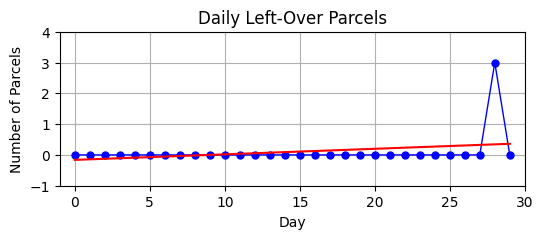

In [68]:
plotLeftOver(df_18)

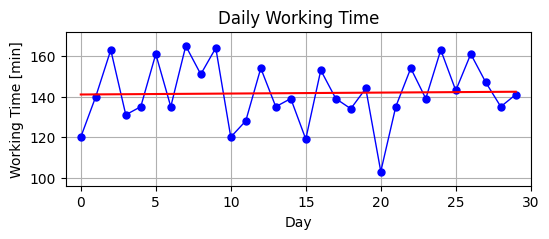

In [69]:
plotWorkingTime(df_18)

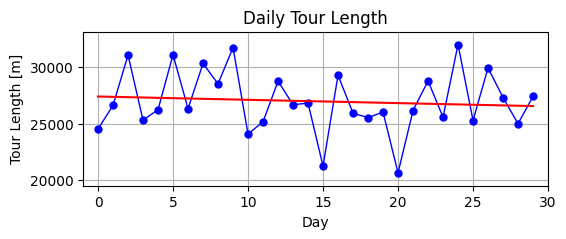

In [70]:
plotTourLength(df_18)

# 100 Customer 20 Warehouse 30 Days

In [176]:
dfs = load_rec_data("100C_20W/")

In [177]:
len(dfs)

19

In [178]:
_, p_value = anova_cal_19(dfs)

In [179]:
stats_sig(p_value)

The p-value is not statistically significant. Fail to reject the null hypothesis.


- Plots

In [180]:
cost = sum_of_cost(dfs)
print(cost)
minw = cost['Total Cost'].min().round(2)
print(minw)

       DataFrame  Total Cost
0    Warehouse_0  2194.59920
1    Warehouse_1  2208.81744
2    Warehouse_2  2175.30080
3    Warehouse_3  2161.76512
4    Warehouse_4  2148.16552
5    Warehouse_5  2152.46464
6    Warehouse_6  2154.65696
7    Warehouse_7  2185.85904
8    Warehouse_8  2169.64472
9    Warehouse_9  2161.93160
10  Warehouse_10  2171.58680
11  Warehouse_11  2151.23560
12  Warehouse_12  2155.14408
13  Warehouse_13  2177.30608
14  Warehouse_14  2163.77056
15  Warehouse_15  2188.35936
16  Warehouse_16  2227.59648
17  Warehouse_17  2199.23536
18  Warehouse_18  2182.76568
2148.17


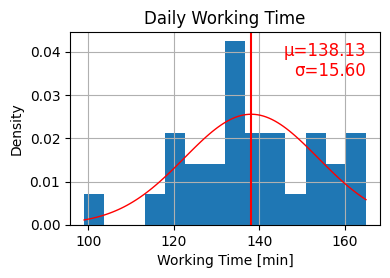

In [181]:
histWorkingTime(dfs[4])

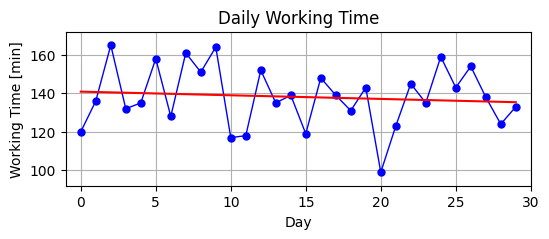

In [182]:
plotWorkingTime(dfs[4])

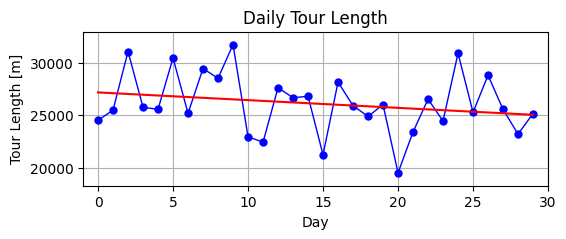

In [183]:
plotTourLength(dfs[4])

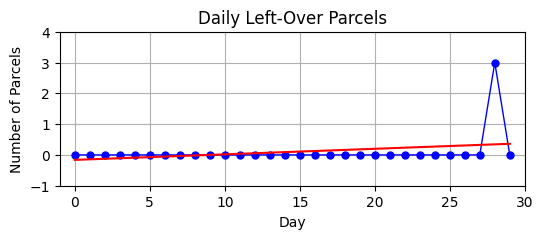

In [184]:
plotLeftOver(dfs[4])

# 100 Customers 10 Warehouses 30 Days

In [202]:
dfs = load_rec_data("100C_10W/")

In [200]:
_, p_value = anova_cal_10(dfs)

In [201]:
p_value

0.8977377057483977

In [188]:
stats_sig(p_value)

The p-value is not statistically significant. Fail to reject the null hypothesis.


In [189]:
cost = sum_of_cost(dfs)
cost['Total Cost'].min().round(2)

2144.41

In [190]:
cost = sum_of_cost(dfs)
print(cost)
minw = cost['Total Cost'].min().round(2)
print(minw)

     DataFrame  Total Cost
0  Warehouse_0  2208.81744
1  Warehouse_1  2169.20016
2  Warehouse_2  2147.16944
3  Warehouse_3  2152.46464
4  Warehouse_4  2176.10512
5  Warehouse_5  2167.25064
6  Warehouse_6  2173.14880
7  Warehouse_7  2144.40792
8  Warehouse_8  2223.26312
9  Warehouse_9  2210.00480
2144.41


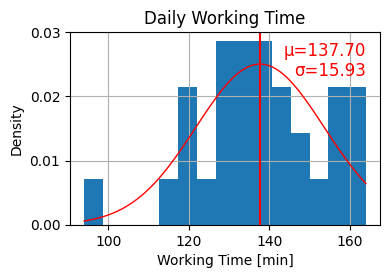

In [191]:
histWorkingTime(dfs[7])

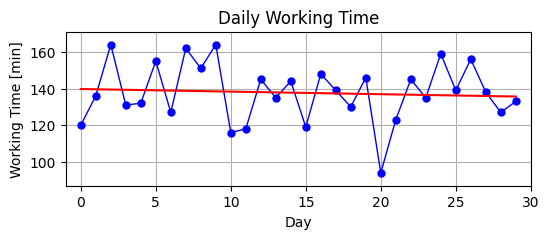

In [192]:
plotWorkingTime(dfs[7])

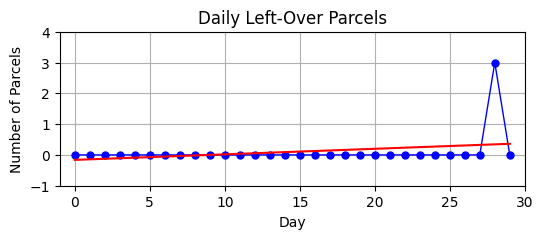

In [203]:
plotLeftOver(dfs[7])

# 150 Customer 20 Warehouse 30 Days

In [208]:
dfs = load_rec_data("_/")

In [194]:
_, p_value = anova_cal_19(dfs)
p_value

0.9997234521649107

In [195]:
stats_sig(p_value)

The p-value is not statistically significant. Fail to reject the null hypothesis.


In [198]:
cost = sum_of_cost(dfs)
print(cost)
cost['Total Cost'].min().round(2)

       DataFrame  Total Cost
0    Warehouse_0  2757.47936
1    Warehouse_1  2777.04552
2    Warehouse_2  2722.47368
3    Warehouse_3  2705.60192
4    Warehouse_4  2705.63712
5    Warehouse_5  2701.47552
6    Warehouse_6  2735.57960
7    Warehouse_7  2746.45088
8    Warehouse_8  2724.38920
9    Warehouse_9  2706.15224
10  Warehouse_10  2732.53384
11  Warehouse_11  2707.19880
12  Warehouse_12  2725.91552
13  Warehouse_13  2736.76024
14  Warehouse_14  2730.38360
15  Warehouse_15  2768.70016
16  Warehouse_16  2725.16968
17  Warehouse_17  2764.31472
18  Warehouse_18   931.09256


931.09

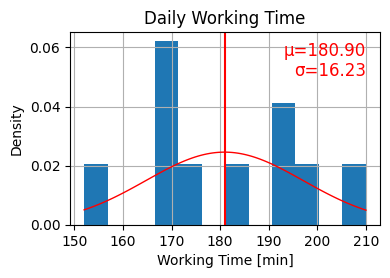

In [210]:
histWorkingTime(dfs[18])

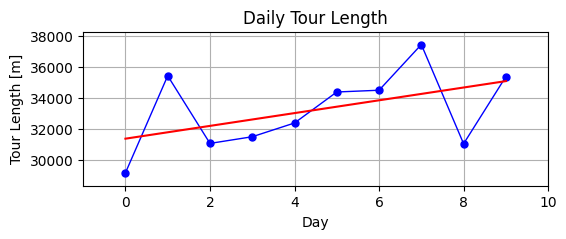

In [211]:
plotTourLength(dfs[18])

C:\Users\smula\AppData\Local\Temp\ipykernel_2136\678394850.py:16: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(ymin, ymax)


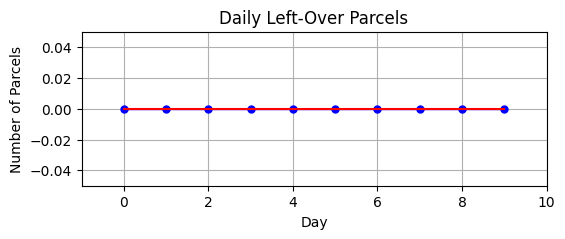

In [209]:
plotLeftOver(dfs[18])